# Will a Customer Accept the Coupon?

**Overview**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout this analysis we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem. To review the brief overview of CRISP-DM, please see **[Here](https://github.com/jasonszz/MLAI-2023/tree/main/Module_20_Capstone_Project_Initial_Report_and_EDA/CRISP-DM%20Framework)**.  

## Business Understanding: 

From a business perspective, we are tasked with identifying key drivers for what would make a Customer to accept the coupon while driving throught a town.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In current marketing advertising business, coupon distribution has been one of the effective ways to engage customers with business products or service promotion, whether is for preserving current customers or attracting new customers. 

Rather than frequently and randomly sending out coupon to each customer, which could potentially damage a business reputation (such as junk solicitation) and waste limited advertising resource (such as budget), understanding the customers' preference first would help business send the right coupon that could match the customers' needs. 

According to each customer's different profile character, such as shopping preference or spending limit, predicting whether a customer will accept the coupon is a difficult task. however, with the help of machine learning techniques, we can build a prediction model that could help the business get an insight of what are the most importance features that related to customers, based on customers' profile character and shopping history, and then distributing the correct coupon accordingly.

### Goal

The goal of this project is to select the most effective model to help predict whether a customer will accept the coupon. For customers who choose to accept the coupon are labeled as Y = 1 (True), whereas who choose to reject the coupon are labeled as Y = 0 (False), which turns this task into be a Classification problem, under supervised machine learning. 

Thus, we will build and train multiple machine learning Classification models with customers' profile character (such as demographic and contextual attributes), compare each model's performance efficiency, and select the best model. With the selected best model, we will further identify which feature(s) that most effectively influence the predicting accuracy to whether a customer will likely accept the coupon.

## Data Understanding


**Data Source**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk **[Link](https://archive.ics.uci.edu/dataset/603/in+vehicle+coupon+recommendation)**. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

Keep in mind that these values mentioned below are average values.

The attributes of this data set include:

**1. User attributes:**

    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

**2. Contextual attributes**

    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


**3. Coupon attributes**

    - time before it expires: 2 hours or one day

### Exploratory Data Analysis (EDA)

In [1]:
# Import basic libraries for EDA (DataFrame) and Visualization (plots)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/Users/timetravel/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**1. Read in the `coupons.csv` file.**

In [2]:
# Read the data from .csv file

data = pd.read_csv('data/coupons.csv')

In [3]:
data.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1


**2. Investigate the dataset for missing or problematic data.**

In [4]:
# Get the gerneral info of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
# Summerize the Null value in the dataframe

data.isnull().sum().sort_values(ascending = False)

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
destination                 0
passanger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64

In [6]:
# Summerize any column that contains missing data (null value) with their missing percentage

missing_data = pd.DataFrame({'Missing Value Counts': data.isnull().sum(),
                             'Missing Percentage': data.isnull().sum()*100 / len(data)})

missing_data[missing_data['Missing Value Counts'] != 0]

,Missing Value Counts,Missing Percentage
car,12576,99.148534
Bar,107,0.843582
CoffeeHouse,217,1.710817
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Restaurant20To50,189,1.490066


**3. Decide what to do about your missing data -- drop, replace, other...**

- A quick info display shows that colmn "car" has almost 99% on Null data and 1% of the useless data; therefore, this feature (column) need to be drop becuase it is lack of predictive power due to large portion of missing data.
- For the rest of features that contains missing value, they will be filled with the most common value of that perticular categorical of numerical feature.

In [7]:
# Filled missing data with Mode Imputation method

data.Bar = data.Bar.fillna(data.Bar.value_counts().index[0])
data.CoffeeHouse = data.CoffeeHouse.fillna(data.CoffeeHouse.value_counts().index[0])
data.CarryAway = data.CarryAway.fillna(data.CarryAway.value_counts().index[0])
data.RestaurantLessThan20 = data.RestaurantLessThan20.fillna(data.RestaurantLessThan20.value_counts().index[0])
data.Restaurant20To50 = data.Restaurant20To50.fillna(data.Restaurant20To50.value_counts().index[0])

In [8]:
# Re-verified missing value in dataframe

data.isnull().sum().sort_values(ascending = False)

car                     12576
destination                 0
passanger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
Restaurant20To50            0
RestaurantLessThan20        0
CarryAway                   0
CoffeeHouse                 0
Bar                         0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64

In [9]:
# Get Correlation of current Numerical features from dataframe 

data.corr(numeric_only = True)

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Y,0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


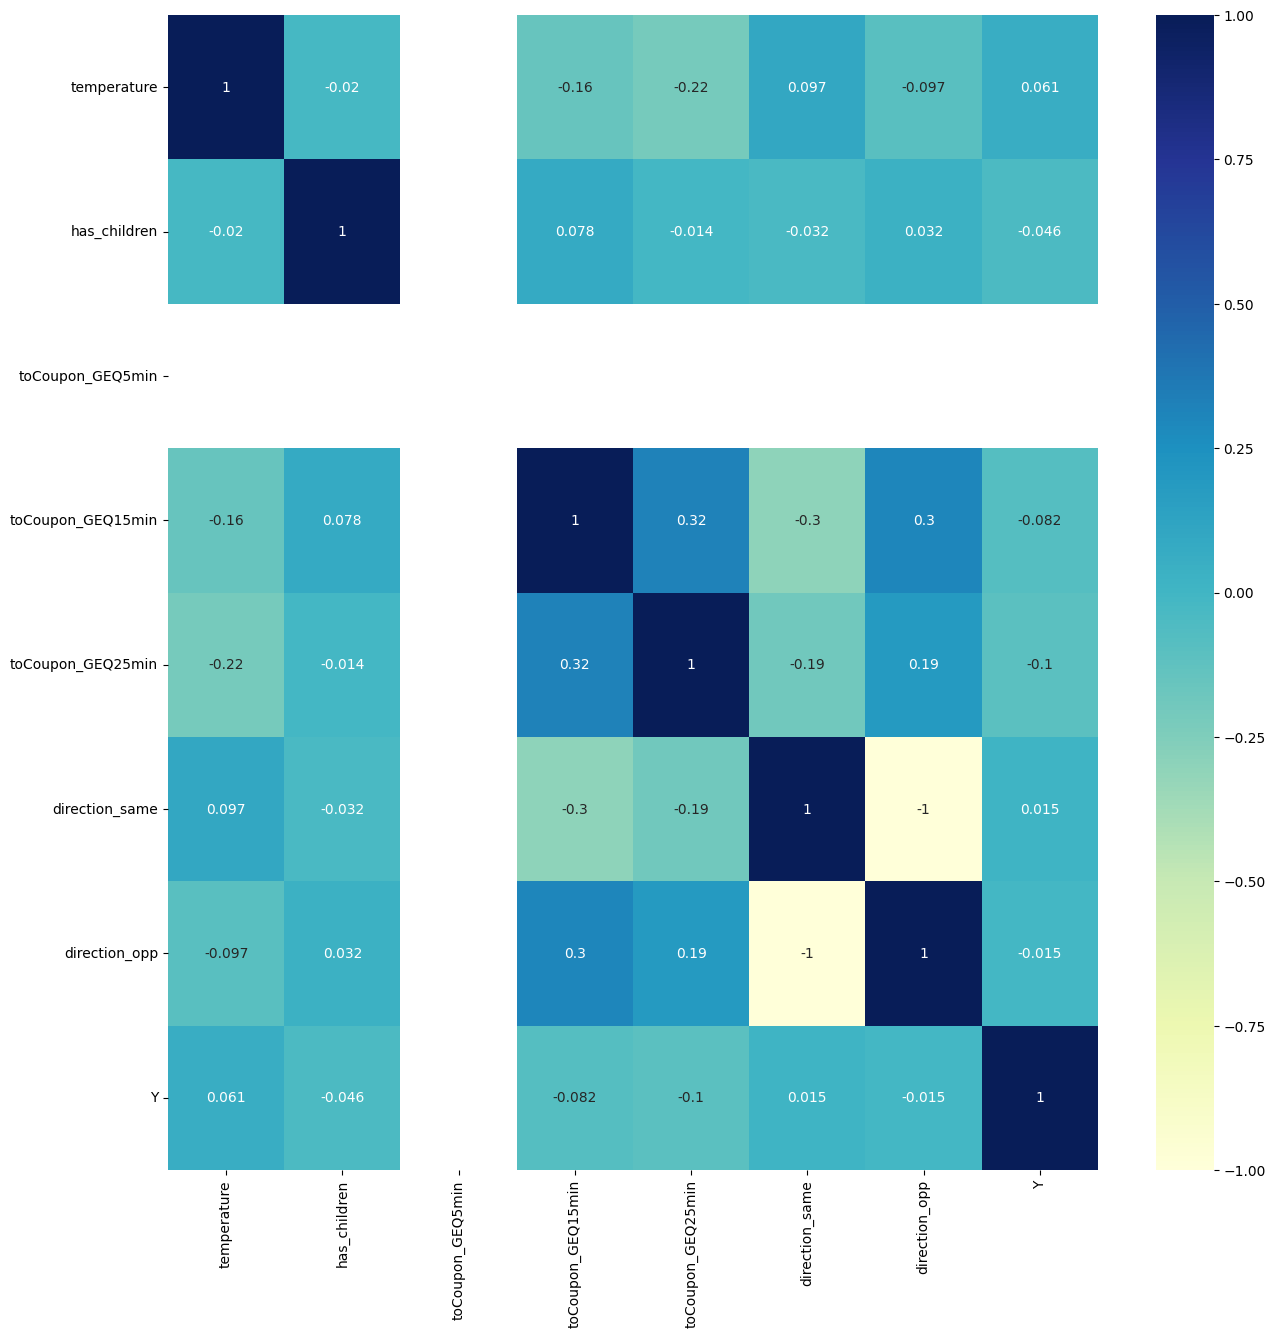

In [10]:
# Heatmap with Correlation of current Numerical features for visualization purpose

plt.figure(figsize = (15, 15))

dataplot = sns.heatmap(data.corr(numeric_only = True), cmap = "YlGnBu", annot = True)

# Save a copy of plot image
plt.savefig("images/Heatmap with Correlation of Numerical features.png") 

- According to above **Correlation Matrix**, feature like "toCoupon_GEQ5min" show no correlated relationship (correlation value = NaN) to the Target feature (feature "Y") due to it has the same value (= 1) as the Targert feature at every given single data points. Therefore, this feature will not help with predicting the Target feature, hence, it is needed to droped for further analysis.

- In addition, features like "direction_same" and "direction_opp" have the same correlation value (absolute value) to the Target feature. Thus, choosing only one of them should be sufficient to represent both predictive power, in terms of predicting the target feature.

**4. Current Categorical features analysis**

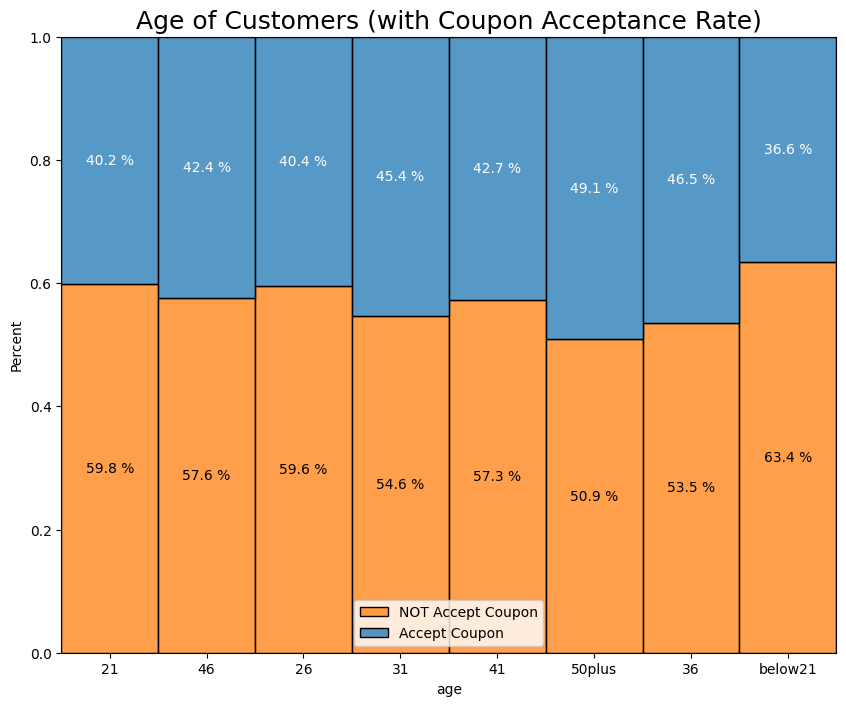

In [11]:
# Visualization of Age of Customers (with Coupon Acceptance Rate)

plt.figure(figsize = (10, 8))

age_fig = sns.histplot(data = data, x = 'age', hue = 'Y', binwidth = 10, stat = 'percent', multiple = 'fill')

for bar_group, color in zip(age_fig.containers, ['black', 'white']):
    age_fig.bar_label(bar_group, label_type = 'center', color = color,
                labels = [f'{bar.get_height() * 100:.1f} %' if bar.get_height() > 0 else '' for bar in bar_group])

mylabels = ['NOT Accept Coupon', 'Accept Coupon']
plt.legend(labels = mylabels)
age_fig.set_title('Age of Customers (with Coupon Acceptance Rate)', fontsize = 18)

# Save a copy of plot image
plt.savefig('images/Age of Customers (with Coupon Acceptance Rate).png')

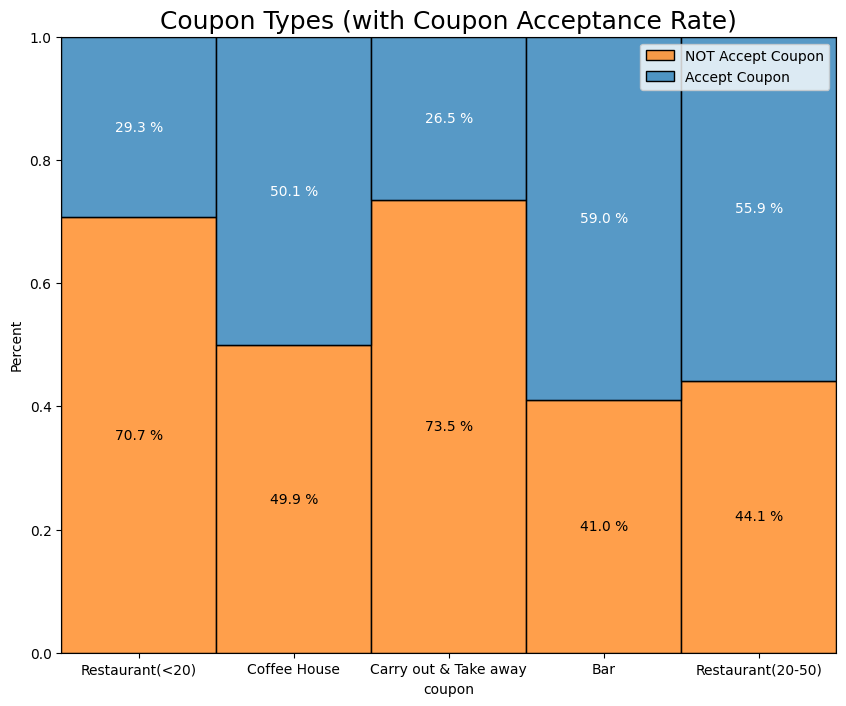

In [12]:
# Visualization of Coupon Types (with Coupon Acceptance Rate)

plt.figure(figsize = (10, 8))

coupon_fig = sns.histplot(data = data, x = 'coupon', hue = 'Y', binwidth = 10, stat = 'percent', multiple = 'fill')

for bar_group, color in zip(coupon_fig.containers, ['black', 'white']):
    coupon_fig.bar_label(bar_group, label_type = 'center', color = color,
                labels = [f'{bar.get_height() * 100:.1f} %' if bar.get_height() > 0 else '' for bar in bar_group])

mylabels = ['NOT Accept Coupon', 'Accept Coupon']
plt.legend(labels = mylabels)
coupon_fig.set_title('Coupon Types (with Coupon Acceptance Rate)', fontsize = 18)

# Save a copy of plot image
plt.savefig('images/Coupon Types (with Coupon Acceptance Rate).png')

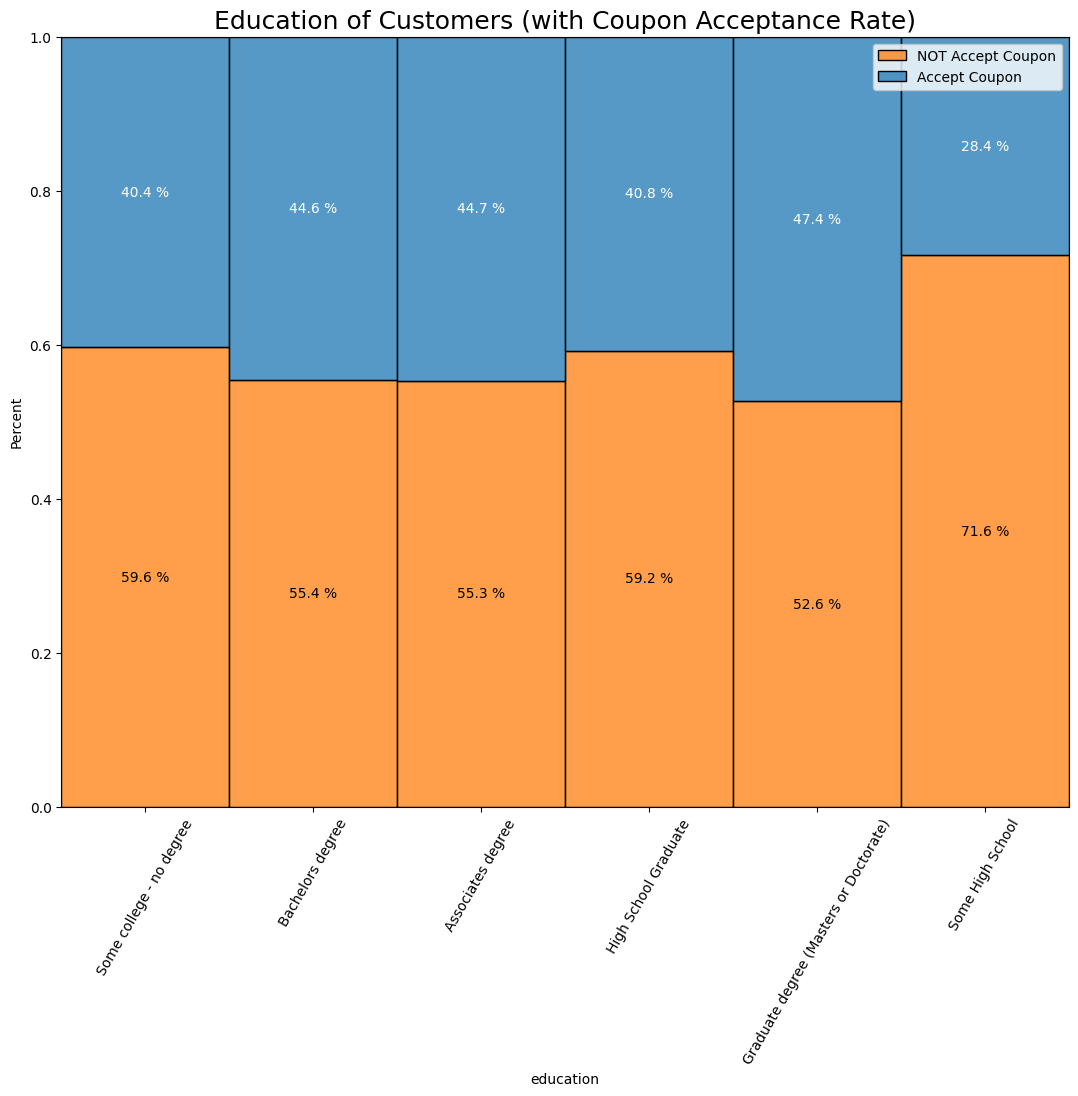

In [13]:
# Visualization of Education of Customers (with Coupon Acceptance Rate)

plt.figure(figsize = (13, 10))

education_fig = sns.histplot(data = data, x = 'education', hue = 'Y', binwidth = 10, stat = 'percent', multiple = 'fill')

for bar_group, color in zip(education_fig.containers, ['black', 'white']):
    education_fig.bar_label(bar_group, label_type = 'center', color = color,
                labels = [f'{bar.get_height() * 100:.1f} %' if bar.get_height() > 0 else '' for bar in bar_group])

mylabels = ['NOT Accept Coupon', 'Accept Coupon']
plt.legend(labels = mylabels)
plt.xticks(rotation = 60)
education_fig.set_title('Education of Customers (with Coupon Acceptance Rate)', fontsize = 18)

# Save a copy of plot image
plt.savefig('images/Education of Customers (with Coupon Acceptance Rate).png')

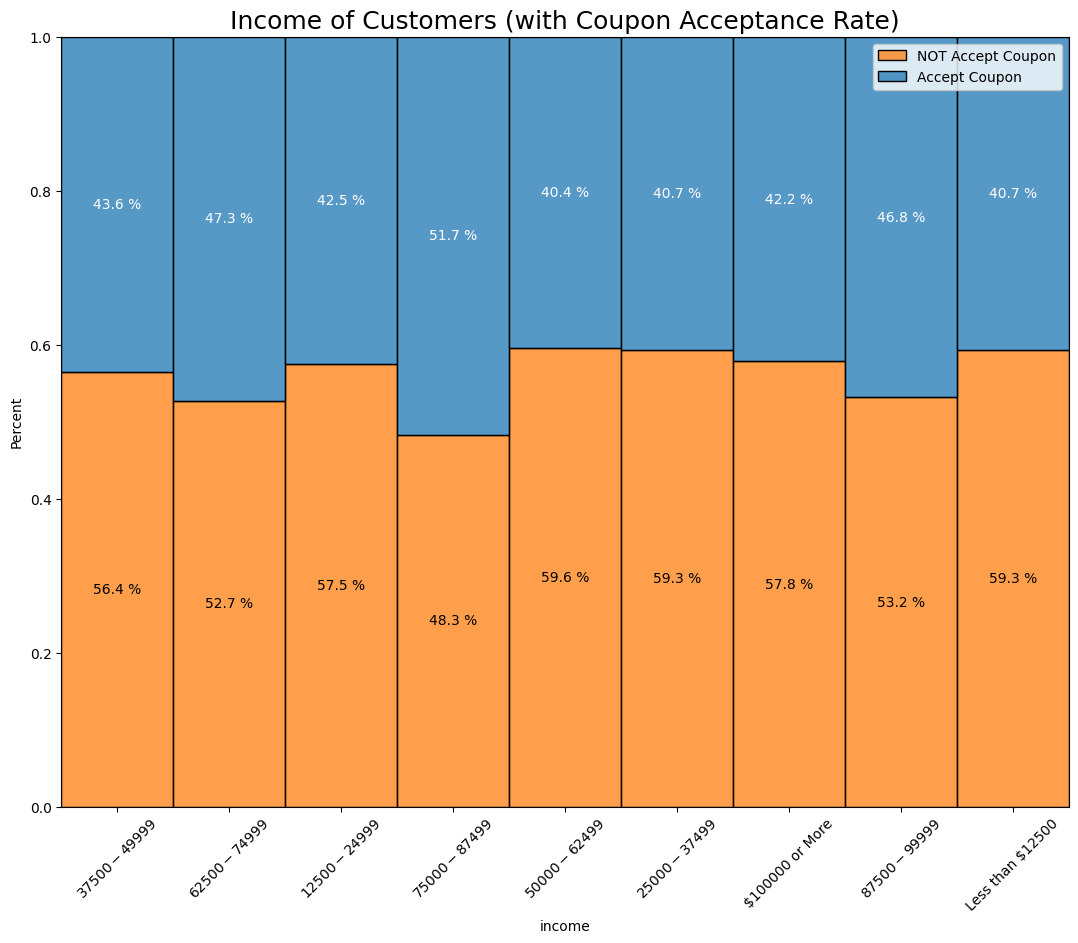

In [14]:
# Visualization of Income of Customers (with Coupon Acceptance Rate)

plt.figure(figsize = (13, 10))

income_fig = sns.histplot(data = data, x = 'income', hue = 'Y', binwidth = 10, stat = 'percent', multiple = 'fill')

for bar_group, color in zip(income_fig.containers, ['black', 'white']):
    income_fig.bar_label(bar_group, label_type = 'center', color = color,
                labels = [f'{bar.get_height() * 100:.1f} %' if bar.get_height() > 0 else '' for bar in bar_group])

mylabels = ['NOT Accept Coupon', 'Accept Coupon']
plt.legend(labels = mylabels)
plt.xticks(rotation = 45)
income_fig.set_title('Income of Customers (with Coupon Acceptance Rate)', fontsize = 18)

# Save a copy of plot image
plt.savefig('images/Income of Customers (with Coupon Acceptance Rate).png')

**4. Total observations of Coupon Acceptance Rate**

In [15]:
# Verify the total count of column Y (as Coupon Acceptance counts)
data.Y.value_counts()

1    7210
0    5474
Name: Y, dtype: int64

<Axes: xlabel='Y', ylabel='Count'>

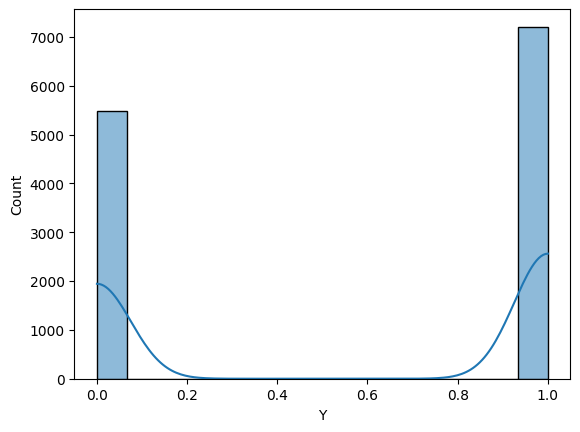

In [16]:
# Create a histogram for column Y (as Coupon Acceptance counts) with kde
sns.histplot(data, x = 'Y', kde = True)

In [17]:
# Probability distribution rate of Subscribed vs Non-Subscribed Clients (Target Value)

df_target_norm = data.Y.value_counts(normalize = True)
df_target_norm

1    0.568433
0    0.431567
Name: Y, dtype: float64

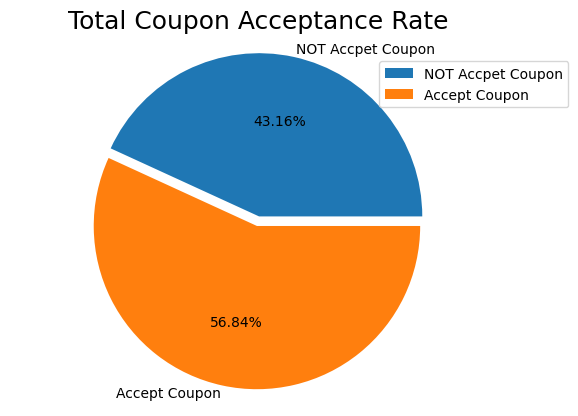

In [18]:
# Create a pieplot as 'Total Coupon Acceptance Ratio Comparison' for visualization purpose
total_coupon_accpet_raito = data['Y'].value_counts(True)

total_coupon_accpet_raito_pie = np.array([total_coupon_accpet_raito[0], total_coupon_accpet_raito[1]])

mylabels = ['NOT Accpet Coupon', 'Accept Coupon']

plt.pie(total_coupon_accpet_raito_pie, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title('Total Coupon Acceptance Rate', fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.14, 0.87), loc = 'right')
plt.axis('equal')

# Save a copy of plot image
plt.savefig('images/Pie plot of Customer Coupon Acceptance Rate.png')

### Brief Summary

- According to above plot (Count of Clients Coupon Accepted Rate (Target Value)), the target value ('Coupon Acceptance') shows the dataset is a  **partial balanced dataset**, with rate of No (False or 0) as approximate 43%, whereas Yes (True or 1) as approximate 57%. This insight will impact the later decision making of model choosing based on the how well does the model handle partial balanced dataset.

## Data Preparation
### Data define and reclassify 

**1. converted string to easy read value for columns "Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"**

In [19]:
# Create a function for multiple columns' value reclassify

def purpose(x):
    if x == 'never' or x == 'less1':
        return '0'
    elif x == '1~3':
        return '1_X_3'
    elif x == '4~8':
        return '4_X_8'
    elif x == 'gt8':
        return 'X_8'
    else:
        return x

# Replace the value in specific columns for easy reading
revised_df = data

revised_df['Bar'] = revised_df['Bar'].apply(purpose)
revised_df['CoffeeHouse'] = revised_df['CoffeeHouse'].apply(purpose)
revised_df['CarryAway'] = revised_df['CarryAway'].apply(purpose)
revised_df['RestaurantLessThan20'] = revised_df['RestaurantLessThan20'].apply(purpose)
revised_df['Restaurant20To50'] = revised_df['Restaurant20To50'].apply(purpose)

**2. Reclassify value column "age", and convert string to number to help range selection.**

In [20]:
# Create a function for column value "age" reclassify

def purpose(x):
    if x == 'below21':
        return '21'
    elif x == '50plus':
        return '50'
    else:
      return x

# Replace the value in specific columns for easy reading
revised_df['age'] = revised_df['age'].apply(purpose)
revised_df['age'] = pd.to_numeric(revised_df['age'])

In [21]:
# Rename mispell feature name "passanger" to "passenger"

revised_df = revised_df.rename(columns = {'passanger': 'passenger'})

In [22]:
revised_df.head(3)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0,1_X_3,4_X_8,1_X_3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,1_X_3,4_X_8,1_X_3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,0,1_X_3,4_X_8,1_X_3,1,1,0,0,1,1


### Features Preprocessing  

### Engineering Features¶

In [23]:
# Import related libraries for Column Transform, Data Scale, PolynomialFeatures, and Pipeline

from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

### Creating preprocessing Pipeline:

1. One-hot encoding categorical features

2. Scale numerical features

3. Added Polynomial features into model train and test

In [24]:
# Define Categorical features 

category_selector = make_column_selector(dtype_include = object)

In [25]:
# Create Pipeline for standard data scale and Polynomial Feature 

numerical_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures())
])

In [26]:
# Create data transformer for data transform

transformer = make_column_transformer(
    (OneHotEncoder(drop = 'if_binary', handle_unknown = 'ignore'), category_selector),
    remainder = numerical_pipeline,
    #verbose_feature_names_out = False
)

### Split dataset into Train and Test. Create a baseline for all model train and test results comparison

### Train/Test dataset Split

With data prepared, split it into a train and test set.

In [27]:
# Import related libraries for dataset split into train set and test set

from sklearn.model_selection import train_test_split

In [28]:
# Get a copy of cleaned dataframe

df = revised_df.copy()

**Note:**
- According to **EDA** phrase, droping features: "car", "toCoupon_GEQ5min", and "direction_opp. Please see **EDA** phrase **step 3** for more details.

In [29]:
# Drop unnecessary feature from dataset and split dataset into train set and test set

X = df.drop(columns = ['Y', 'car', 'toCoupon_GEQ5min', 'direction_opp'], axis = 1)
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

## Modeling

**Note:** 

- All models will run through the same process separately in order to make fairly comparison in term of 
performance.

In [30]:
# Import related libraries for Baseline model build, train/test, and evaluation.

from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
import time

### Build a Baseline Model for overall comparison

In [31]:
# Create a Baseline model for ground rule comparison, with DummyClassifier

baseline_start = time.process_time()

baseline_clf = DummyClassifier(strategy = 'stratified', random_state = 42)

# Fit and train the model
baseline_clf.fit(X_train, y_train)

y_pred_baseline = baseline_clf.predict(X_test)

baseline_end = time.process_time()
baseline_CPU_run_time = baseline_end - baseline_start

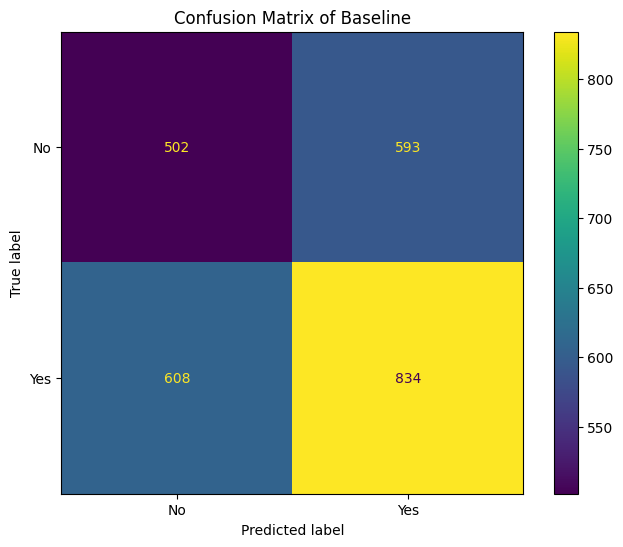

In [32]:
# Create Confusion Matrix for results display

fig, ax = plt.subplots(figsize = (8, 6))
ConfusionMatrixDisplay.from_estimator(baseline_clf, X_test, y_test, ax = ax, display_labels = ['No', 'Yes'])
plt.title('Confusion Matrix of Baseline')

# Save a copy of plot image
plt.savefig('images/Confusion Matrix of Baseline.png')

In [33]:
# Generate summary report

train_accuracy_baseline = baseline_clf.score(X_train, y_train)
test_accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
test_recall_baseline = recall_score(y_test, y_pred_baseline)

print('Baseline (Dummy) Elapsed time (in Training): ', baseline_CPU_run_time)
print('Baseline (Dummy) Accuracy Score (Train):     ', train_accuracy_baseline)
print('Baseline (Dummy) Accuracy Score (Test):      ', test_accuracy_baseline)
print('Baseline (Dummy) Recall Score (Test):        ', test_recall_baseline, '\n')

report_baseline = classification_report(y_test, y_pred_baseline)

print('Baseline (Dummy) Full Clarification Report Summary: ', '\n')
print(report_baseline)

Baseline (Dummy) Elapsed time (in Training):  0.002202999999999733
Baseline (Dummy) Accuracy Score (Train):      0.5165073420715482
Baseline (Dummy) Accuracy Score (Test):       0.5266062278281435
Baseline (Dummy) Recall Score (Test):         0.5783633841886269 

Baseline (Dummy) Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.45      0.46      0.46      1095
           1       0.58      0.58      0.58      1442

    accuracy                           0.53      2537
   macro avg       0.52      0.52      0.52      2537
weighted avg       0.53      0.53      0.53      2537



### Build Simple Models (with Default setting) for Baseline Model Comparison

**Model List:**

1. Logistic Regressio
2. KNeighbors
3. Decision Tree
4. Support Vector Machines (SVM)
5. Random Forest
6. XGBClassifier

In [34]:
# Import related libraries for Logistic Regression, KNeighbors, Decision Tree, SVM,
# Random Forest, and XGBClassifier model build, train/test, and evaluation.model build, train/test, and evaluation.

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [35]:
# Build a basic Logistic Regression model with default settings

lgr_basic_start = time.process_time()

# Set up Logistic Regressio Pipeline
lgr_basic_pipe = Pipeline([
    ('transform', transformer),
    ('lgr_basic_model', LogisticRegression(max_iter = 10000))])

# Fit and train the model
lgr_basic_pipe.fit(X_train, y_train)

y_pred_lgr_basic = lgr_basic_pipe.predict(X_test)

lgr_basic_end = time.process_time()

lgr_basic_CPU_run_time = lgr_basic_end - lgr_basic_start

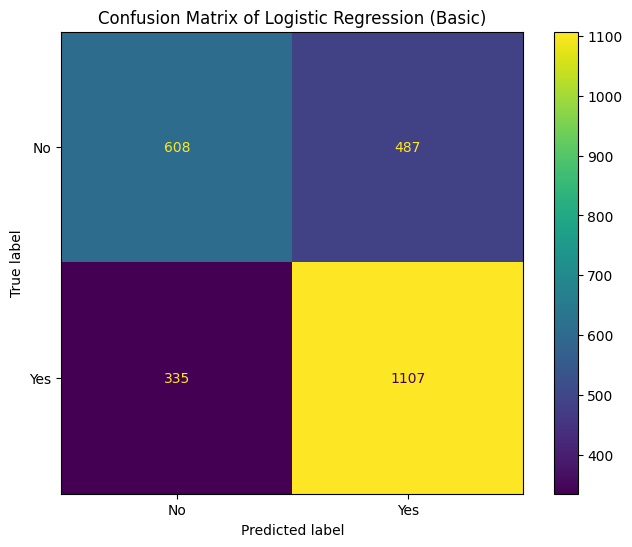

In [36]:
# Create Confusion Matrix for results display

fig, ax = plt.subplots(figsize = (8, 6))
ConfusionMatrixDisplay.from_estimator(lgr_basic_pipe, X_test, y_test, ax = ax, display_labels = ['No', 'Yes'])
plt.title('Confusion Matrix of Logistic Regression (Basic)')

# Save a copy of plot image
plt.savefig('images/Confusion Matrix of Logistic Regression (Basic).png')

In [37]:
# Generate summary report

train_accuracy_lgr_basic = lgr_basic_pipe.score(X_train, y_train)
test_accuracy_lgr_basic = accuracy_score(y_test, y_pred_lgr_basic)
test_recall_lgr_basic = recall_score(y_test, y_pred_lgr_basic)

print('Basic Logistic Regression Elapsed time (in Training): ', lgr_basic_CPU_run_time)
print('Basic Logistic Regression Accuracy Score (Train):     ', train_accuracy_lgr_basic)
print('Basic Logistic Regression Accuracy Score (Test):      ', test_accuracy_lgr_basic)
print('Basic Logistic Regression Recall Score (Test):        ', test_recall_lgr_basic, '\n')

report_lgr_basic = classification_report(y_test, y_pred_lgr_basic)

print('Basic Logistic Regression Full Clarification Report Summary: ', '\n')
print(report_lgr_basic)

Basic Logistic Regression Elapsed time (in Training):  3.326175000000001
Basic Logistic Regression Accuracy Score (Train):      0.689464866462994
Basic Logistic Regression Accuracy Score (Test):       0.6759952700039417
Basic Logistic Regression Recall Score (Test):         0.7676837725381415 

Basic Logistic Regression Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.64      0.56      0.60      1095
           1       0.69      0.77      0.73      1442

    accuracy                           0.68      2537
   macro avg       0.67      0.66      0.66      2537
weighted avg       0.67      0.68      0.67      2537



In [38]:
# Build a basic KNeighbors model with default settings

knn_basic_start = time.process_time()

# Set up KNeighbors Pipeline
knn_basic_pipe = Pipeline([
    ('transform', transformer),
    ('knn_basic_model', KNeighborsClassifier())])

# Fit and train the model
knn_basic_pipe.fit(X_train, y_train)

y_pred_knn_basic = knn_basic_pipe.predict(X_test)

knn_basic_end = time.process_time()

knn_basic_CPU_run_time = knn_basic_end - knn_basic_start

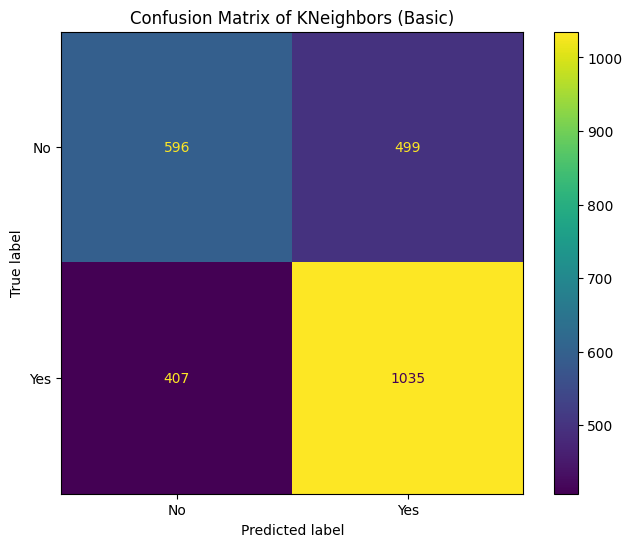

In [39]:
# Create Confusion Matrix for results display

fig, ax = plt.subplots(figsize = (8, 6))
ConfusionMatrixDisplay.from_estimator(knn_basic_pipe, X_test, y_test, ax = ax, display_labels = ['No', 'Yes'])
plt.title('Confusion Matrix of KNeighbors (Basic)')

# Save a copy of plot image
plt.savefig('images/Confusion Matrix of KNeighbors (Basic).png')

In [40]:
# Generate summary report

train_accuracy_knn_basic = knn_basic_pipe.score(X_train, y_train)
test_accuracy_knn_basic = accuracy_score(y_test, y_pred_knn_basic)
test_recall_knn_basic = recall_score(y_test, y_pred_knn_basic)

print('Basic KNeighbors Elapsed time (in Training): ', knn_basic_CPU_run_time)
print('Basic KNeighbors Accuracy Score (Train):     ', train_accuracy_knn_basic)
print('Basic KNeighbors Accuracy Score (Test):      ', test_accuracy_knn_basic)
print('Basic KNeighbors Recall Score (Test):        ', test_recall_knn_basic, '\n')

report_knn_basic = classification_report(y_test, y_pred_knn_basic)

print('Basic KNeighbors Full Clarification Report Summary: ', '\n')
print(report_knn_basic)

Basic KNeighbors Elapsed time (in Training):  2.296061
Basic KNeighbors Accuracy Score (Train):      0.7795407509608752
Basic KNeighbors Accuracy Score (Test):       0.6428852975955853
Basic KNeighbors Recall Score (Test):         0.717753120665742 

Basic KNeighbors Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.59      0.54      0.57      1095
           1       0.67      0.72      0.70      1442

    accuracy                           0.64      2537
   macro avg       0.63      0.63      0.63      2537
weighted avg       0.64      0.64      0.64      2537



In [41]:
# Build a basic Decision Tree model with default settings

dt_basic_start = time.process_time()

# Set up Decision Tree Pipeline
dt_basic_pipe = Pipeline([
    ('transform', transformer),
    ('dt_basic_model', DecisionTreeClassifier())])

# Fit and train the model
dt_basic_pipe.fit(X_train, y_train)

y_pred_dt_basic = dt_basic_pipe.predict(X_test)

dt_basic_end = time.process_time()

dt_basic_CPU_run_time = dt_basic_end - dt_basic_start

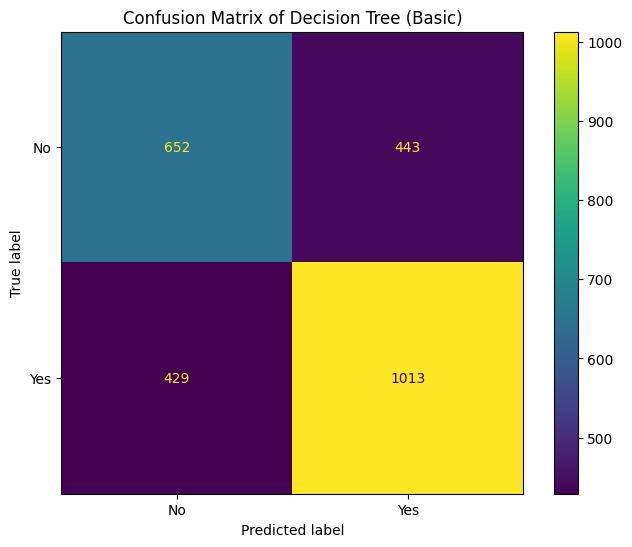

In [42]:
# Create Confusion Matrix for results display

fig, ax = plt.subplots(figsize = (8, 6))
ConfusionMatrixDisplay.from_estimator(dt_basic_pipe, X_test, y_test, ax = ax, display_labels = ['No', 'Yes'])
plt.title('Confusion Matrix of Decision Tree (Basic)')

# Save a copy of plot image
plt.savefig('images/Confusion Matrix of Decision Tree (Basic).png')

In [43]:
# Generate summary report

train_accuracy_dt_basic = dt_basic_pipe.score(X_train, y_train)
test_accuracy_dt_basic = accuracy_score(y_test, y_pred_dt_basic)
test_recall_dt_basic = recall_score(y_test, y_pred_dt_basic)

print('Basic Decision Tree Elapsed time (in Training): ', dt_basic_CPU_run_time)
print('Basic Decision Tree Accuracy Score (Train):     ', train_accuracy_dt_basic)
print('Basic Decision Tree Accuracy Score (Test):      ', test_accuracy_dt_basic)
print('Basic Decision Tree Recall Score (Test):        ', test_recall_dt_basic, '\n')

report_dt_basic = classification_report(y_test, y_pred_dt_basic)

print('Basic Decision Tree Full Clarification Report Summary: ', '\n')
print(report_dt_basic)

Basic Decision Tree Elapsed time (in Training):  0.8221509999999981
Basic Decision Tree Accuracy Score (Train):      0.9988173844486055
Basic Decision Tree Accuracy Score (Test):       0.6562869530942057
Basic Decision Tree Recall Score (Test):         0.70249653259362 

Basic Decision Tree Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.60      0.60      0.60      1095
           1       0.70      0.70      0.70      1442

    accuracy                           0.66      2537
   macro avg       0.65      0.65      0.65      2537
weighted avg       0.66      0.66      0.66      2537



In [44]:
# Build a basic SVC model with default settings

svc_basic_start = time.process_time()

# Set up SVC Pipeline
svc_basic_pipe = Pipeline([
    ('transform', transformer),
    ('svc_basic_model', SVC())])

# Fit and train the model
svc_basic_pipe.fit(X_train, y_train)

y_pred_svc_basic = svc_basic_pipe.predict(X_test)

svc_basic_end = time.process_time()

svc_basic_CPU_run_time = svc_basic_end - svc_basic_start

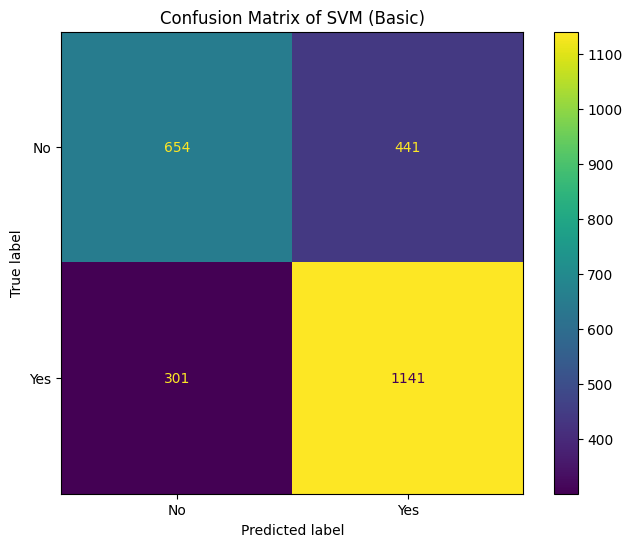

In [45]:
# Create Confusion Matrix for results display

fig, ax = plt.subplots(figsize = (8, 6))
ConfusionMatrixDisplay.from_estimator(svc_basic_pipe, X_test, y_test, ax = ax, display_labels = ['No', 'Yes'])
plt.title('Confusion Matrix of SVM (Basic)')

# Save a copy of plot image
plt.savefig('images/Confusion Matrix of SVM (Basic).png')

In [46]:
# Generate summary report

train_accuracy_svc_basic = svc_basic_pipe.score(X_train, y_train)
test_accuracy_svc_basic = accuracy_score(y_test, y_pred_svc_basic)
test_recall_svc_basic = recall_score(y_test, y_pred_svc_basic)

print('Basic SVM Elapsed time (in Training): ', svc_basic_CPU_run_time)
print('Basic SVM Accuracy Score (Train):     ', train_accuracy_svc_basic)
print('Basic SVM Accuracy Score (Test):      ', test_accuracy_svc_basic)
print('Basic SVM Recall Score (Test):        ', test_recall_svc_basic, '\n')

report_svc_basic = classification_report(y_test, y_pred_svc_basic)

print('Basic SVM Full Clarification Report Summary: ', '\n')
print(report_svc_basic)

Basic SVM Elapsed time (in Training):  7.859721
Basic SVM Accuracy Score (Train):      0.7500739134719622
Basic SVM Accuracy Score (Test):       0.7075285770595191
Basic SVM Recall Score (Test):         0.7912621359223301 

Basic SVM Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.68      0.60      0.64      1095
           1       0.72      0.79      0.75      1442

    accuracy                           0.71      2537
   macro avg       0.70      0.69      0.70      2537
weighted avg       0.71      0.71      0.70      2537



In [47]:
# Build a basic Random Forest model with default settings

rfc_basic_start = time.process_time()

# Set up SVC Pipeline
rfc_basic_pipe = Pipeline([
    ('transform', transformer),
    ('rfc_basic_model', RandomForestClassifier())])

# Fit and train the model
rfc_basic_pipe.fit(X_train, y_train)

y_pred_rfc_basic = rfc_basic_pipe.predict(X_test)

rfc_basic_end = time.process_time()

rfc_basic_CPU_run_time = rfc_basic_end - rfc_basic_start

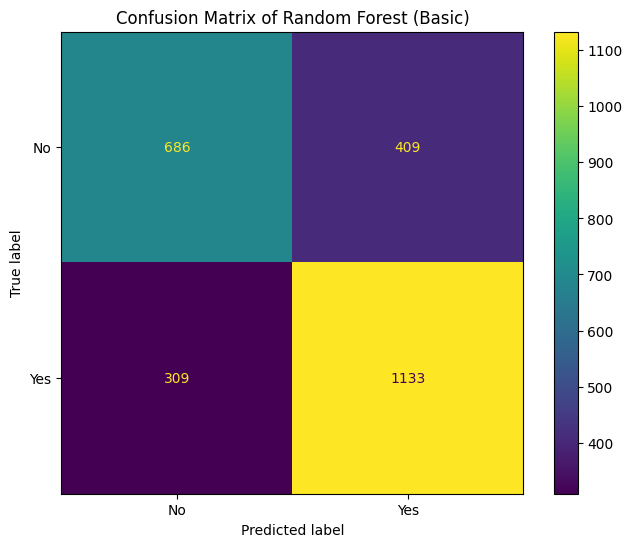

In [48]:
# Create Confusion Matrix for results display

fig, ax = plt.subplots(figsize = (8, 6))
ConfusionMatrixDisplay.from_estimator(rfc_basic_pipe, X_test, y_test, ax = ax, display_labels = ['No', 'Yes'])
plt.title('Confusion Matrix of Random Forest (Basic)')

# Save a copy of plot image
plt.savefig('images/Confusion Matrix of Random Forest (Basic).png')

In [49]:
# Generate summary report

train_accuracy_rfc_basic = rfc_basic_pipe.score(X_train, y_train)
test_accuracy_rfc_basic = accuracy_score(y_test, y_pred_rfc_basic)
test_recall_rfc_basic = recall_score(y_test, y_pred_rfc_basic)

print('Basic Random Forest Elapsed time (in Training): ', rfc_basic_CPU_run_time)
print('Basic Random Forest Accuracy Score (Train):     ', train_accuracy_rfc_basic)
print('Basic Random Forest Accuracy Score (Test):      ', test_accuracy_rfc_basic)
print('Basic Random Forest Recall Score (Test):        ', test_recall_rfc_basic, '\n')

report_rfc_basic = classification_report(y_test, y_pred_rfc_basic)

print('Basic Random Forest Full Clarification Report Summary: ', '\n')
print(report_rfc_basic)

Basic Random Forest Elapsed time (in Training):  0.9085109999999972
Basic Random Forest Accuracy Score (Train):      0.9988173844486055
Basic Random Forest Accuracy Score (Test):       0.7169885691761924
Basic Random Forest Recall Score (Test):         0.7857142857142857 

Basic Random Forest Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.69      0.63      0.66      1095
           1       0.73      0.79      0.76      1442

    accuracy                           0.72      2537
   macro avg       0.71      0.71      0.71      2537
weighted avg       0.72      0.72      0.71      2537



In [50]:
# Build a basic XGBClassifier model with default settings

xgb_basic_start = time.process_time()

# Set up SVC Pipeline
xgb_basic_pipe = Pipeline([
    ('transform', transformer),
    ('xgb_basic_model', XGBClassifier())])

# Fit and train the model
xgb_basic_pipe.fit(X_train, y_train)

y_pred_xgb_basic = xgb_basic_pipe.predict(X_test)

xgb_basic_end = time.process_time()

xgb_basic_CPU_run_time = xgb_basic_end - xgb_basic_start

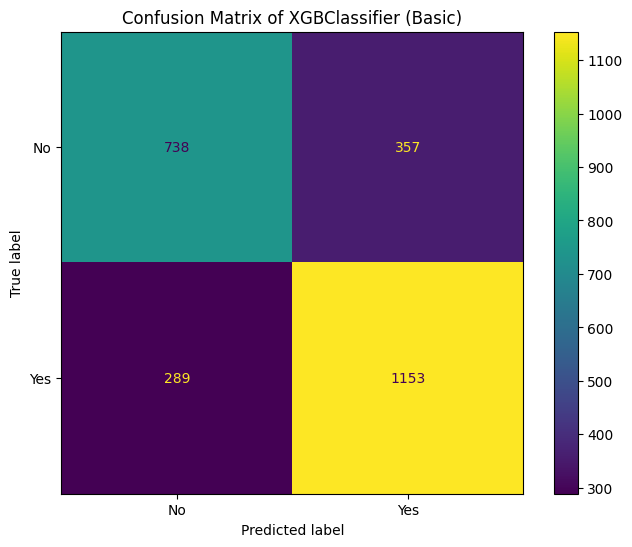

In [51]:
# Create Confusion Matrix for results display

fig, ax = plt.subplots(figsize = (8, 6))
ConfusionMatrixDisplay.from_estimator(xgb_basic_pipe, X_test, y_test, ax = ax, display_labels = ['No', 'Yes'])
plt.title('Confusion Matrix of XGBClassifier (Basic)')

# Save a copy of plot image
plt.savefig('images/Confusion Matrix of XGBClassifier (Basic).png')

In [52]:
# Generate summary report

train_accuracy_xgb_basic = xgb_basic_pipe.score(X_train, y_train)
test_accuracy_xgb_basic = accuracy_score(y_test, y_pred_xgb_basic)
test_recall_xgb_basic = recall_score(y_test, y_pred_xgb_basic)

print('Basic XGBClassifier Elapsed time (in Training): ', xgb_basic_CPU_run_time)
print('Basic XGBClassifier Accuracy Score (Train):     ', train_accuracy_xgb_basic)
print('Basic XGBClassifier Accuracy Score (Test):      ', test_accuracy_xgb_basic)
print('Basic XGBClassifier Recall Score (Test):        ', test_recall_xgb_basic, '\n')

report_xgb_basic = classification_report(y_test, y_pred_xgb_basic)

print('Basic XGBClassifier Full Clarification Report Summary: ', '\n')
print(report_xgb_basic)

Basic XGBClassifier Elapsed time (in Training):  6.040606000000004
Basic XGBClassifier Accuracy Score (Train):      0.9159357445550409
Basic XGBClassifier Accuracy Score (Test):       0.745368545526212
Basic XGBClassifier Recall Score (Test):         0.7995839112343966 

Basic XGBClassifier Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.72      0.67      0.70      1095
           1       0.76      0.80      0.78      1442

    accuracy                           0.75      2537
   macro avg       0.74      0.74      0.74      2537
weighted avg       0.74      0.75      0.74      2537



In [53]:
# Basic Model comparison chart

model_basic_list = ['Dummy Model (Baseline)', 'Logistic Regression', 'KNeighbors',
                    'Decision Tree', 'Support Vector Machines (SVM)',
                    'Random Forest', 'XGBClassifier']

model_basic_train_time = [baseline_CPU_run_time, lgr_basic_CPU_run_time, knn_basic_CPU_run_time, 
                          dt_basic_CPU_run_time, svc_basic_CPU_run_time,
                          rfc_basic_CPU_run_time, xgb_basic_CPU_run_time]

model_basic_train_score = [train_accuracy_baseline, train_accuracy_lgr_basic, train_accuracy_knn_basic, 
                           train_accuracy_dt_basic, train_accuracy_svc_basic,
                           train_accuracy_rfc_basic, train_accuracy_xgb_basic]

model_basic_test_score = [test_accuracy_baseline, test_accuracy_lgr_basic, test_accuracy_knn_basic, 
                          test_accuracy_dt_basic, test_accuracy_svc_basic,
                          test_accuracy_rfc_basic, test_accuracy_xgb_basic
                         ]

model_basic_recall_score = [test_recall_baseline, test_recall_lgr_basic, test_recall_knn_basic, 
                            test_recall_dt_basic, test_recall_svc_basic,
                            test_recall_rfc_basic, test_recall_xgb_basic
                           ]

df_models = pd.DataFrame(list(zip(model_basic_list, model_basic_train_time, model_basic_train_score, 
                                  model_basic_test_score, model_basic_recall_score)), 
                         columns = ['Model (with Default Setting)', 'Train Time (Total CPU Execution time)',
                                    'Train Score (Accuracy)', 'Test Score (Accuracy)', 'Test Score (Recall)']
                        )
df_models

,Model (with Default Setting),Train Time (Total CPU Execution time),Train Score (Accuracy),Test Score (Accuracy),Test Score (Recall)
0,Dummy Model (Baseline),0.002203,0.516507,0.526606,0.578363
1,Logistic Regression,3.326175,0.689465,0.675995,0.767684
2,KNeighbors,2.296061,0.779541,0.642885,0.717753
3,Decision Tree,0.822151,0.998817,0.656287,0.702497
4,Support Vector Machines (SVM),7.859721,0.750074,0.707529,0.791262
5,Random Forest,0.908511,0.998817,0.716989,0.785714
6,XGBClassifier,6.040606,0.915936,0.745369,0.799584


### Brief Summary

- According above model comparison chart, all models (Logistic Regression, KNeighbors, Decision Tree, Support Vector Machines(SVM), Random Forest, and XGBClassifier) surpass the baseline model (DummyClassifier), with higher Train Score (Accuracy), Test Score (Accuracy and Recall).

- However, although some of the high **Accuracy Score** from certain model may look great, there may still be issue, such as overfitting concern. For example, Decision Tree and Random Forest computed to the "best score" in Train Score (Accuracy) (approximate 99%), but holds the relatively "low" Test Score (Accuracy) (approximate 70% and 79%, respectively), which indicates that this model contains **overfitting** issue. 

- In addition, the **Recall Score** from each model actually have higher values than the models' accuracy score; therefore, the models' accuracy score may not be useful in here, in term of basic (transitional) classification task processing, or model performance comparison and evaluation. 

- Therefore, the following step will be model improving and introducing another two more proper Performance Metric for this kind of dataset, called **ROC_AUC Score** and **F1 Score**. ROC_AUC is well-known and widely used evaluation metric that can be implemented to optimistically handle partial balanced dataset only with few samples from the minority class, while F1 Score is also a great evaluation metric which can handle well uneven class distribution by providing the measure of the harmonic mean of precision and recall.

### Improving the Model

- In model tuning phrase, **Grid Search** will be included, to help seach and select **Hyperparameter** for each model.

- ROC_AUC plots the False Positive Rate (FPR) versus the True Positive Rate (TPR), which allows visualizing how well the model's performance by identifying the class discrimination (in other words, distinguishing between the Postive classes and Negative classes). An ROC_AUC score is within a range from 0 to 1, as ideal model with score of 1, meaning the classifier can perfectly distinguish between all the Positive class points and the Negative class points. In general, a model with ROC_AUC score less than 0.5 indicates that the selected classifier may not work properly with the current dataset.

In [54]:
# Import related libraries for model performance tuning 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [55]:
# Implement Grid Search for Logistic Regression model (Hyperparameter) tuning

lgr_grid_start = time.process_time()

# Set up Logistic Regression Pipeline
lgr_grid_pipe = Pipeline([
    ('transform', transformer),
    ('lgr', LogisticRegression(max_iter = 10000))])

# Set up Logistic Regression Parameters
lgr_params = {'transform__remainder__poly__degree': range(1, 3),
              'lgr__penalty': ['l1', 'l2'],
              'lgr__solver': ['lbfgs', 'liblinear'],
              'lgr__C': [0.001, 0.01, 0.1, 1, 10]
             }

# Implement Grid Seach to Logistic Regression
lgr_grid = GridSearchCV(lgr_grid_pipe, param_grid = lgr_params, scoring = 'f1', cv = 5, n_jobs = -1)

# Fit and train the model
lgr_grid.fit(X_train, y_train)

y_pred_lgr_grid = lgr_grid.predict(X_test)
y_pred_lgr_grid_roc_auc = lgr_grid.predict_proba(X_test)[:, 1]

lgr_grid_end = time.process_time()
lgr_grid_CPU_run_time = lgr_grid_end - lgr_grid_start

/Users/timetravel/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/timetravel/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/timetravel/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/timetravel/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  

In [56]:
# Summary of the model's best Hyperparameters

lgr_grid.best_params_

{'lgr__C': 0.001,
 'lgr__penalty': 'l2',
 'lgr__solver': 'liblinear',
 'transform__remainder__poly__degree': 1}

In [57]:
# Generate summary report

lgr_grid_f1 = f1_score(y_test, y_pred_lgr_grid)
lgr_grid_roc_auc_score = roc_auc_score(y_test, y_pred_lgr_grid_roc_auc)

print('Grid Search Logistic Regression Elapsed time (in Training): ', lgr_grid_CPU_run_time)
print('Grid Search Logistic Regression F1 Score (Test):            ', lgr_grid_f1)
print('Grid Search Logistic Regression ROC_AUC Score (Test):       ', lgr_grid_roc_auc_score, '\n')

report_lgr_grid = classification_report(y_test, y_pred_lgr_grid)

print('Grid Search Logistic Regression (with F1) Full Clarification Report Summary: ', '\n')
print(report_lgr_grid)

Grid Search Logistic Regression Elapsed time (in Training):  1.7563889999999986
Grid Search Logistic Regression F1 Score (Test):             0.7415797317436661
Grid Search Logistic Regression ROC_AUC Score (Test):        0.7085751018055846 

Grid Search Logistic Regression (with F1) Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.68      0.39      0.50      1095
           1       0.65      0.86      0.74      1442

    accuracy                           0.66      2537
   macro avg       0.67      0.63      0.62      2537
weighted avg       0.66      0.66      0.64      2537



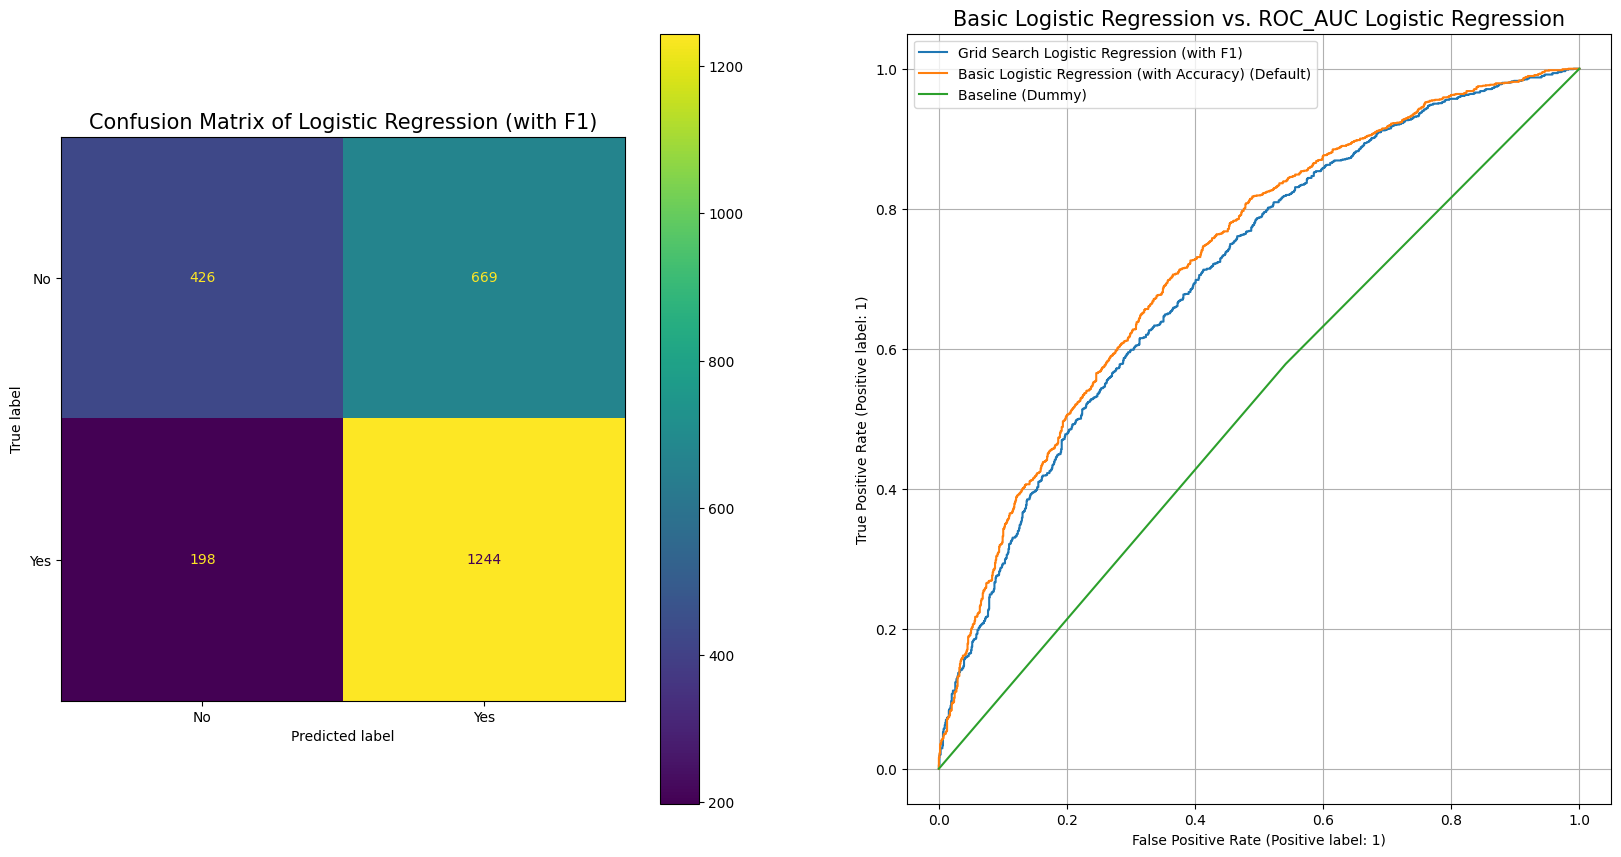

In [58]:
# Create two plots: 1) Confusion Matrix (left) and 2) ROC (right)

fig, ax = plt.subplots(1, 2, figsize = (20, 10))

ConfusionMatrixDisplay.from_estimator(lgr_grid, X_test, y_test, ax = ax[0], display_labels = ['No', 'Yes'])
ax[0].set_title('Confusion Matrix of Logistic Regression (with F1)', fontsize = 15)

RocCurveDisplay.from_estimator(lgr_grid, X_test, y_test, ax = ax[1], 
                               label = 'Grid Search Logistic Regression (with F1)')
RocCurveDisplay.from_estimator(lgr_basic_pipe, X_test, y_test, ax = ax[1], 
                               label = 'Basic Logistic Regression (with Accuracy) (Default)')
RocCurveDisplay.from_estimator(baseline_clf, X_test, y_test, ax = ax[1], label = 'Baseline (Dummy)')
ax[1].set_title('Basic Logistic Regression vs. ROC_AUC Logistic Regression', fontsize = 15)

plt.grid()
plt.legend()

# Save a copy of plot image
plt.savefig('images/Confusion Matrix and ROC_AUC of Logistic Regression.png')

In [59]:
# Implement Grid Search for KNeighbors model (Hyperparameter) tuning

knn_grid_start = time.process_time()

# Set up KNeighbors Pipeline
knn_grid_pipe = Pipeline([('transform', transformer), ('knn', KNeighborsClassifier())])

# Set up KNeighbors Parameters
knn_params = {'knn__n_neighbors': list(range(1, 100, 2))}

# Implement Grid Seach to KNeighbors
knn_grid = GridSearchCV(knn_grid_pipe, param_grid = knn_params, scoring = 'f1', cv = 5, n_jobs = -1)

# Fit and train the model
knn_grid.fit(X_train, y_train)

y_pred_knn_grid = knn_grid.predict(X_test)
y_pred_knn_grid_roc_auc = knn_grid.predict_proba(X_test)[:, 1]

knn_grid_end = time.process_time()
knn_grid_CPU_run_time = knn_grid_end - knn_grid_start

In [60]:
# Summary of the model's best Hyperparameters

knn_grid.best_params_

{'knn__n_neighbors': 57}

In [61]:
# Define the best n_neighbors from KNeighbors Grid Search 

best_k_neighbor = knn_grid.best_params_['knn__n_neighbors']
best_k_neighbor

57

In [62]:
# Generate summary report

knn_grid_f1 = f1_score(y_test, y_pred_knn_grid)
knn_grid_roc_auc_score = roc_auc_score(y_test, y_pred_knn_grid_roc_auc)

print('Grid Search KNeighbors Elapsed time (in Training): ', knn_grid_CPU_run_time)
print('Grid Search KNeighbors F1 Score (Test):            ', knn_grid_f1)
print('Grid Search KNeighbors ROC_AUC Score (Test):       ', knn_grid_roc_auc_score, '\n')

report_knn_grid = classification_report(y_test, y_pred_knn_grid)

print('Grid Search KNeighbors (with F1) Full Clarification Report Summary: ', '\n')
print(report_knn_grid)

Grid Search KNeighbors Elapsed time (in Training):  3.979763999999996
Grid Search KNeighbors F1 Score (Test):             0.7085822068531907
Grid Search KNeighbors ROC_AUC Score (Test):        0.6710229323808258 

Grid Search KNeighbors (with F1) Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.61      0.44      0.51      1095
           1       0.65      0.78      0.71      1442

    accuracy                           0.63      2537
   macro avg       0.63      0.61      0.61      2537
weighted avg       0.63      0.63      0.62      2537



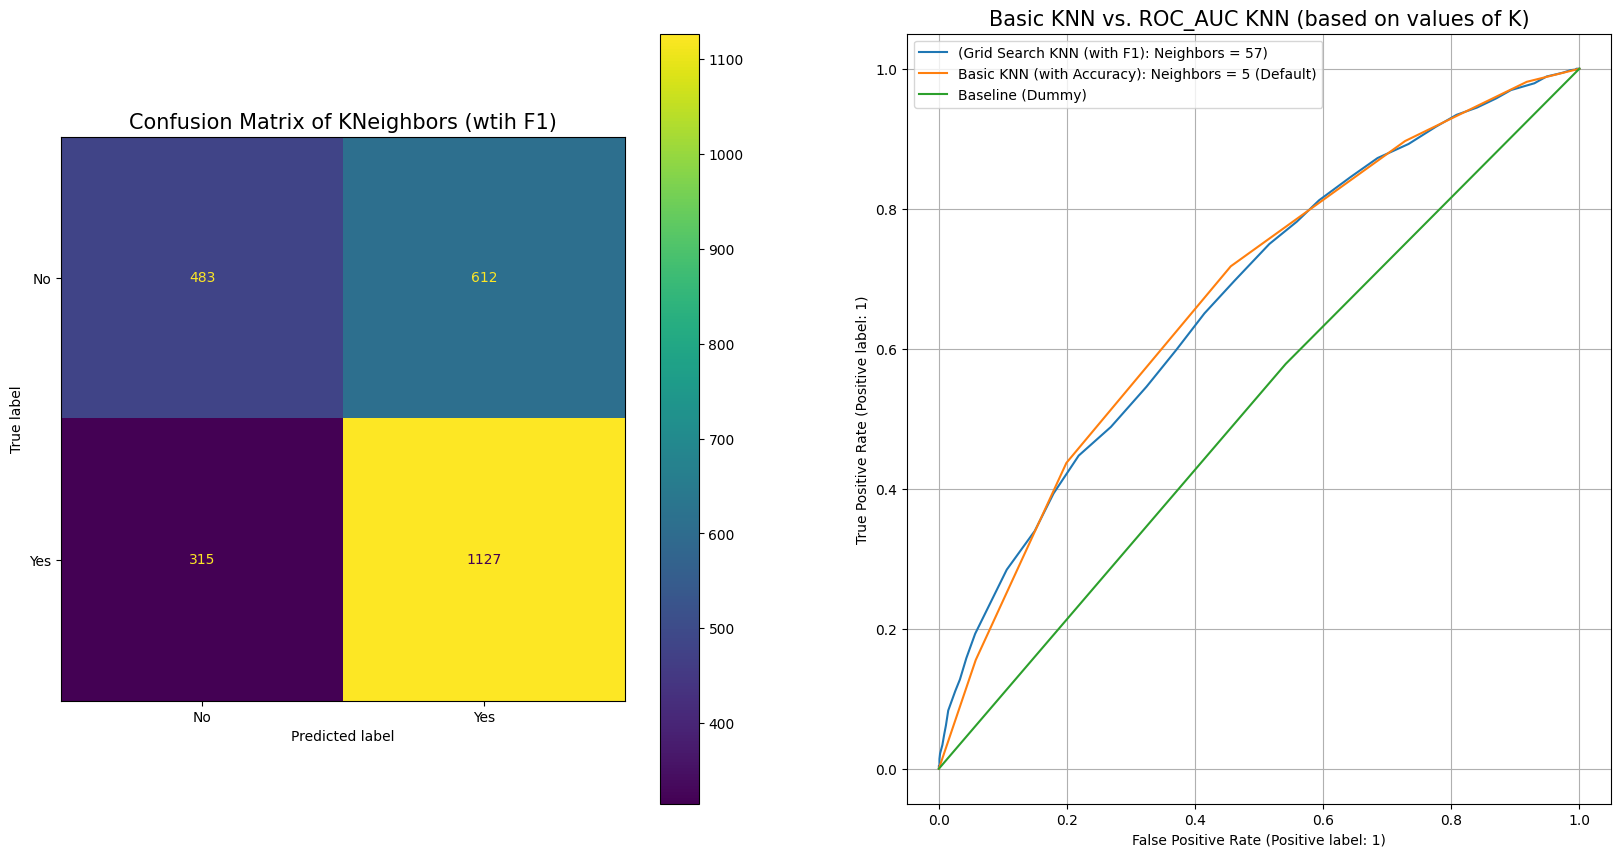

In [63]:
# Create two plots: 1) Confusion Matrix (left) and 2) ROC (right)

fig, ax = plt.subplots(1, 2, figsize = (20, 10))

ConfusionMatrixDisplay.from_estimator(knn_grid, X_test, y_test, ax = ax[0], display_labels = ['No', 'Yes'])
ax[0].set_title('Confusion Matrix of KNeighbors (wtih F1)', fontsize = 15)

RocCurveDisplay.from_estimator(knn_grid, X_test, y_test, ax = ax[1],
                               label = f'(Grid Search KNN (with F1): Neighbors = %0.0f)' % best_k_neighbor)
RocCurveDisplay.from_estimator(knn_basic_pipe, X_test, y_test, ax = ax[1], 
                               label = 'Basic KNN (with Accuracy): Neighbors = 5 (Default)')
RocCurveDisplay.from_estimator(baseline_clf, X_test, y_test, ax = ax[1], label = 'Baseline (Dummy)')
ax[1].set_title('Basic KNN vs. ROC_AUC KNN (based on values of K)', fontsize = 15)

plt.grid()
plt.legend()

# Save a copy of plot image
plt.savefig('images/Confusion Matrix and ROC_AUC of KNeighbors.png')

In [64]:
# Define the max depth value from Decision Tree Grid Search 

dt_basic_max_depth = dt_basic_pipe['dt_basic_model'].get_depth()
dt_basic_max_depth

29

In [65]:
# Implement Grid Search for Decision Tree model (Hyperparameter) tuning

dt_grid_start = time.process_time()

# Set up Decision Tree Pipeline
dt_grid_pipe = Pipeline([
    ('transform', transformer),
    ('dt', DecisionTreeClassifier())])

# Set up  Parameters
dt_params = {'dt__max_depth': list(range(1, 30)), # Basic DT show max depth is under 50
             'dt__min_samples_split': [2, 5, 10],
             'dt__criterion': ['gini', 'entropy'],
             'dt__min_samples_leaf': [1, 3, 6]
            }

# Implement Grid Seach to Decision Tree
dt_grid = GridSearchCV(dt_grid_pipe, param_grid = dt_params, scoring = 'f1', cv = 5, n_jobs = -1)

# Fit and train the model
dt_grid.fit(X_train, y_train)

y_pred_dt_grid = dt_grid.predict(X_test)
y_pred_dt_grid_roc_auc = dt_grid.predict_proba(X_test)[:, 1]

dt_grid_end = time.process_time()

dt_grid_CPU_run_time = dt_grid_end - dt_grid_start

In [66]:
# Summary of the model's best Hyperparameters

dt_grid.best_params_

{'dt__criterion': 'gini',
 'dt__max_depth': 1,
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2}

In [67]:
# Generate summary report

dt_grid_f1 = f1_score(y_test, y_pred_dt_grid)
dt_grid_roc_auc_score = roc_auc_score(y_test, y_pred_dt_grid_roc_auc)

print('Grid Search Decision Tree Elapsed time (in Training): ', dt_grid_CPU_run_time)
print('Grid Search Decision Tree F1 Score (Test):            ', dt_grid_f1)
print('Grid Search Decision Tree ROC_AUC Score (Test):       ', dt_grid_roc_auc_score, '\n')

report_dt_grid = classification_report(y_test, y_pred_dt_grid)

print('Tuned Decision Tree (with F1) Full Clarification Report Summary: ', '\n')
print(report_dt_grid)

Grid Search Decision Tree Elapsed time (in Training):  14.617334999999997
Grid Search Decision Tree F1 Score (Test):             0.7248052274440815
Grid Search Decision Tree ROC_AUC Score (Test):        0.5663620415582112 

Tuned Decision Tree (with F1) Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1095
           1       0.57      1.00      0.72      1442

    accuracy                           0.57      2537
   macro avg       0.28      0.50      0.36      2537
weighted avg       0.32      0.57      0.41      2537



/Users/timetravel/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/timetravel/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/timetravel/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


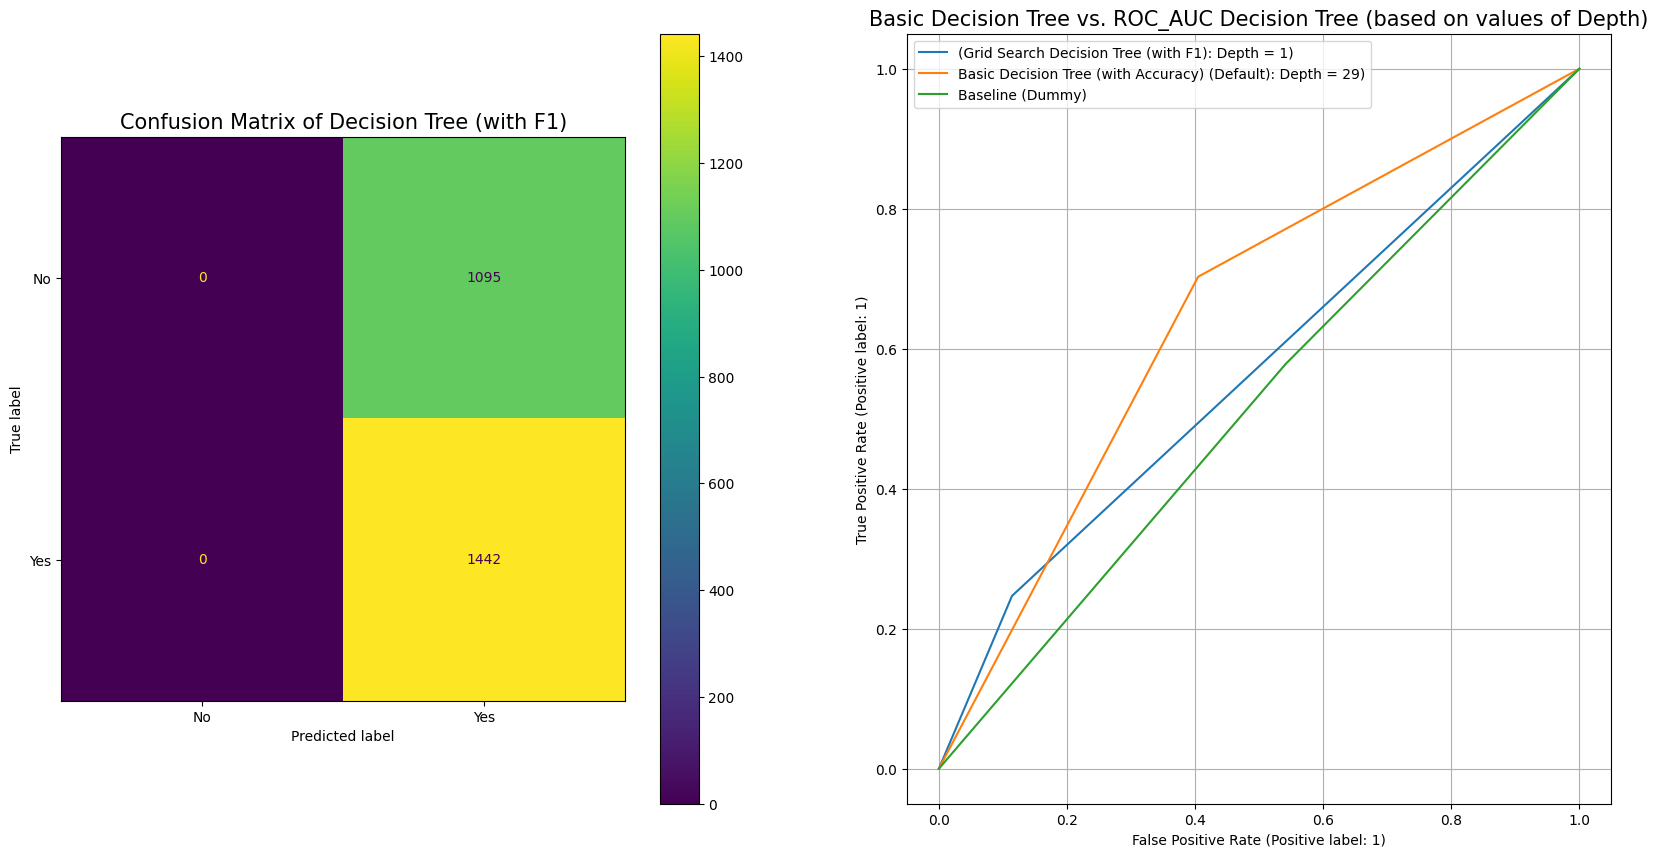

In [68]:
# Find the max depth from Grid Search

dt_grid_max_depth = dt_grid.best_estimator_.get_params()['dt__max_depth']

# Create two plots: 1) Confusion Matrix (left) and 2) ROC (right)

fig, ax = plt.subplots(1, 2, figsize = (20, 10))

ConfusionMatrixDisplay.from_estimator(dt_grid, X_test, y_test, ax = ax[0], display_labels = ['No', 'Yes'])
ax[0].set_title('Confusion Matrix of Decision Tree (with F1)', fontsize = 15)

RocCurveDisplay.from_estimator(dt_grid, X_test, y_test, ax = ax[1], 
                               label = f'(Grid Search Decision Tree (with F1): Depth = %0.0f)' % dt_grid_max_depth)
RocCurveDisplay.from_estimator(dt_basic_pipe, X_test, y_test, ax = ax[1], 
                               label = f'Basic Decision Tree (with Accuracy) (Default): Depth = %0.0f)' % dt_basic_max_depth)
RocCurveDisplay.from_estimator(baseline_clf, X_test, y_test, ax = ax[1], label = 'Baseline (Dummy)')
ax[1].set_title('Basic Decision Tree vs. ROC_AUC Decision Tree (based on values of Depth)', fontsize = 15)

plt.grid()
plt.legend()

# Save a copy of plot image
plt.savefig('images/Confusion Matrix and ROC_AUC of Decision Tree.png')

In [69]:
# Implement Grid Search for SVM model (Hyperparameter) tuning

svc_grid_start = time.process_time()

# Set up SVC Pipeline
svc_grid_pipe = Pipeline([
    ('transform', transformer),
    ('svc', SVC(probability = True))])

# Set up SVC Parameters
# svc_params = {'svc__kernel': ['rbf', 'sigmoid'], 'svc__gamma': [0.1, 1.0, 10.0]} 
svc_params = {'svc__kernel': ['rbf', 'sigmoid', 'linear', 'poly'], 'svc__gamma': [0.1, 1.0, 10.0]} 
              
# Implement Grid Seach to SVM
svc_grid = GridSearchCV(svc_grid_pipe, param_grid = svc_params, scoring = 'f1', cv = 5, n_jobs = -1)

# Fit and train the model
svc_grid.fit(X_train, y_train)

y_pred_svc_grid = svc_grid.predict(X_test)
y_pred_svc_grid_roc_auc = svc_grid.predict_proba(X_test)[:, 1]

svc_grid_end = time.process_time()

svc_grid_CPU_run_time = svc_grid_end - svc_grid_start

In [70]:
# Summary of the model's best Hyperparameters

svc_grid.best_params_

{'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

In [71]:
# Generate summary report

svc_grid_f1 = f1_score(y_test, y_pred_svc_grid)
svc_grid_roc_auc_score = roc_auc_score(y_test, y_pred_svc_grid_roc_auc)

print('Grid Search SVM Elapsed time (in Training): ', svc_grid_CPU_run_time)
print('Grid Search SVM F1 Score (Test):            ', svc_grid_f1)
print('Grid Search SVM ROC_AUC Score (Test):       ', svc_grid_roc_auc_score, '\n')

report_svc_grid = classification_report(y_test, y_pred_svc_grid)

print('Tuned SVM (with F1) Full Clarification Report Summary: ', '\n')
print(report_svc_grid)

Grid Search SVM Elapsed time (in Training):  40.120907
Grid Search SVM F1 Score (Test):             0.7418612298585991
Grid Search SVM ROC_AUC Score (Test):        0.7522264232199065 

Tuned SVM (with F1) Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.67      0.57      0.61      1095
           1       0.71      0.78      0.74      1442

    accuracy                           0.69      2537
   macro avg       0.69      0.68      0.68      2537
weighted avg       0.69      0.69      0.69      2537



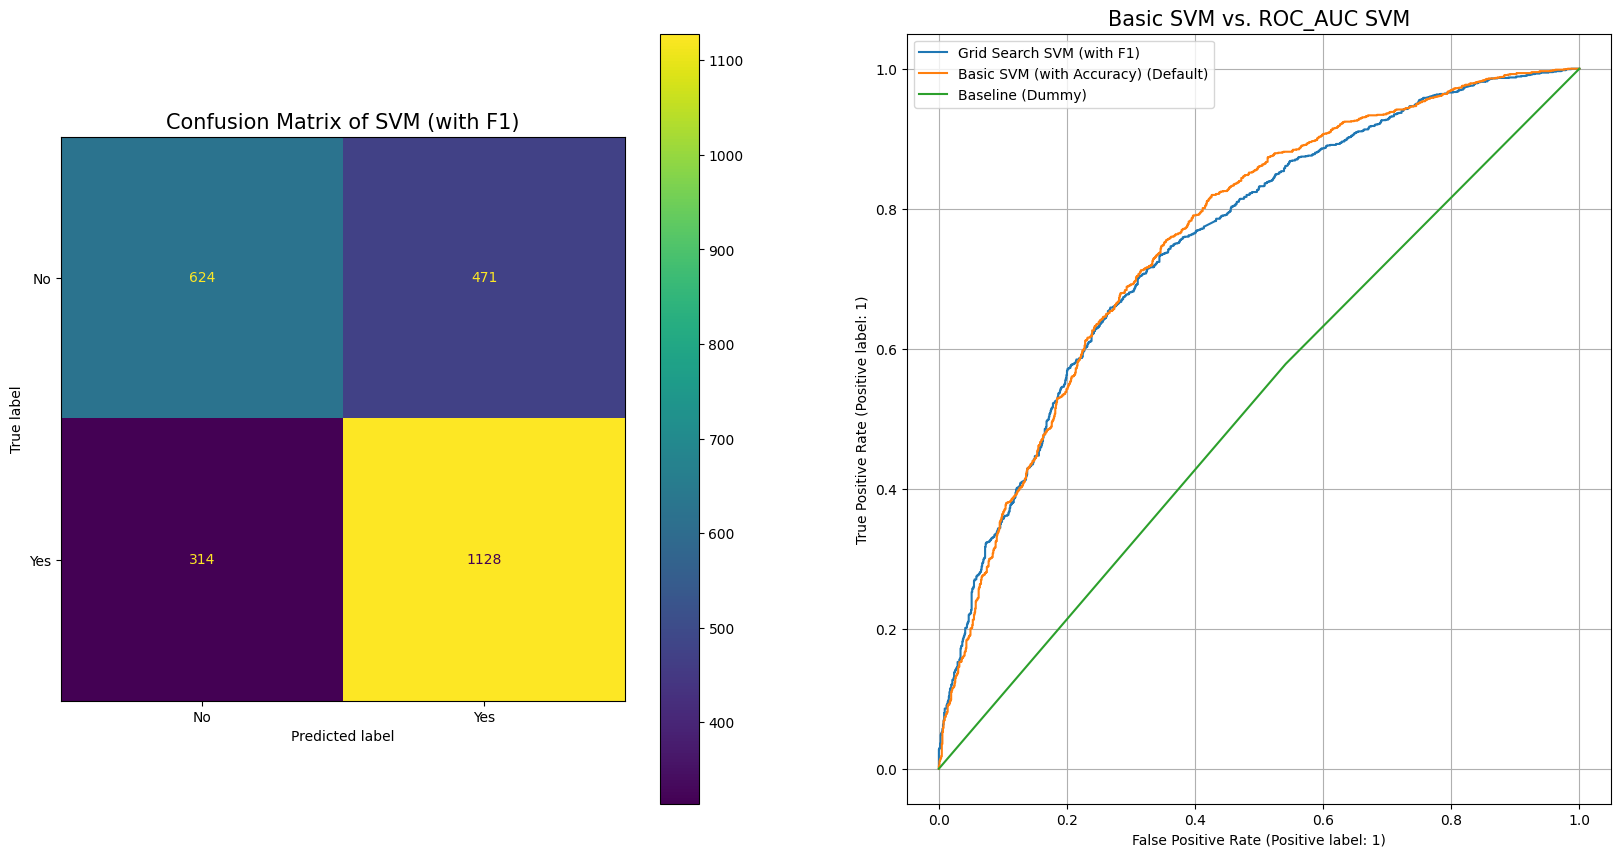

In [72]:
# Create two plots: 1) Confusion Matrix (left) and 2) ROC (right)

fig, ax = plt.subplots(1, 2, figsize = (20, 10))

ConfusionMatrixDisplay.from_estimator(svc_grid, X_test, y_test, ax = ax[0], display_labels = ['No', 'Yes'])
ax[0].set_title('Confusion Matrix of SVM (with F1)', fontsize = 15)

RocCurveDisplay.from_estimator(svc_grid, X_test, y_test, ax = ax[1], 
                               label = 'Grid Search SVM (with F1)')
RocCurveDisplay.from_estimator(svc_basic_pipe, X_test, y_test, ax = ax[1], 
                               label = 'Basic SVM (with Accuracy) (Default)')
RocCurveDisplay.from_estimator(baseline_clf, X_test, y_test, ax = ax[1], label = 'Baseline (Dummy)')
ax[1].set_title('Basic SVM vs. ROC_AUC SVM', fontsize = 15)

plt.grid()
plt.legend()

# Save a copy of plot image
plt.savefig('images/Confusion Matrix and ROC_AUC of SVM.png')

In [73]:
# Implement Grid Search for Random Forest model (Hyperparameter) tuning

rfc_grid_start = time.process_time()

# Set up Random Forest Pipeline
rfc_grid_pipe = Pipeline([
    ('transform', transformer),
    ('rfc', RandomForestClassifier())])

# Set up Random Forest Parameters
rfc_params = {'rfc__max_depth': [3, 6, 9, 12, 15], 
              'rfc__max_features': ['auto', 'sqrt', 'log2'],
              'rfc__n_estimators': [25, 50, 100, 150],
              'rfc__min_samples_split': [8, 10, 12]   
             } 
              
# Implement Grid Seach to Random Forest
rfc_grid = GridSearchCV(rfc_grid_pipe, param_grid = rfc_params, scoring = 'f1', cv = 5, n_jobs = -1)

# Fit and train the model
rfc_grid.fit(X_train, y_train)

y_pred_rfc_grid = rfc_grid.predict(X_test)
y_pred_rfc_grid_roc_auc = rfc_grid.predict_proba(X_test)[:, 1]

rfc_grid_end = time.process_time()

rfc_grid_CPU_run_time = rfc_grid_end - rfc_grid_start

/Users/timetravel/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
199 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/timetravel/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/timetravel/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/timetravel/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py", line 420, in fit
    self._final_esti

In [74]:
# Summary of the model's best Hyperparameters

rfc_grid.best_params_

{'rfc__max_depth': 15,
 'rfc__max_features': 'log2',
 'rfc__min_samples_split': 10,
 'rfc__n_estimators': 100}

In [75]:
# Generate summary report

rfc_grid_f1 = f1_score(y_test, y_pred_rfc_grid)
rfc_grid_roc_auc_score = roc_auc_score(y_test, y_pred_rfc_grid_roc_auc)

print('Grid Search Random Forest Elapsed time (in Training): ', rfc_grid_CPU_run_time)
print('Grid Search Random Forest F1 Score (Test):            ', rfc_grid_f1)
print('Grid Search Random Forest ROC_AUC Score (Test):       ', rfc_grid_roc_auc_score, '\n')

report_rfc_grid = classification_report(y_test, y_pred_svc_grid)

print('Tuned Random Forest (with F1) Full Clarification Report Summary: ', '\n')
print(report_rfc_grid)

Grid Search Random Forest Elapsed time (in Training):  7.367523000000006
Grid Search Random Forest F1 Score (Test):             0.7715019255455712
Grid Search Random Forest ROC_AUC Score (Test):        0.7854349932551821 

Tuned Random Forest (with F1) Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.67      0.57      0.61      1095
           1       0.71      0.78      0.74      1442

    accuracy                           0.69      2537
   macro avg       0.69      0.68      0.68      2537
weighted avg       0.69      0.69      0.69      2537



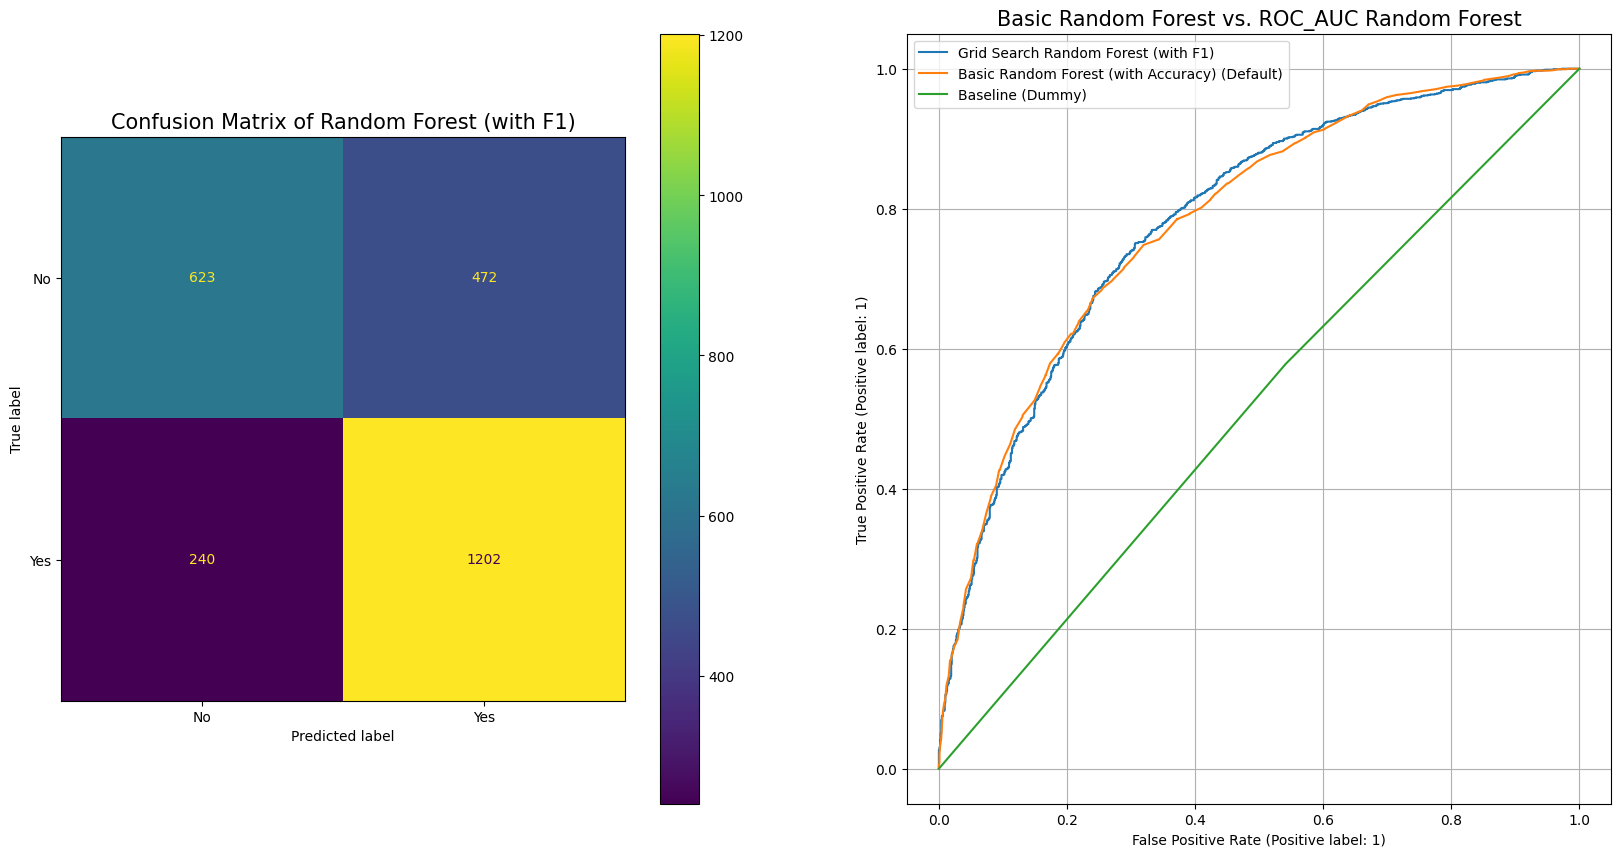

In [76]:
# Create two plots: 1) Confusion Matrix (left) and 2) ROC (right)

fig, ax = plt.subplots(1, 2, figsize = (20, 10))

ConfusionMatrixDisplay.from_estimator(rfc_grid, X_test, y_test, ax = ax[0], display_labels = ['No', 'Yes'])
ax[0].set_title('Confusion Matrix of Random Forest (with F1)', fontsize = 15)

RocCurveDisplay.from_estimator(rfc_grid, X_test, y_test, ax = ax[1], 
                               label = 'Grid Search Random Forest (with F1)')
RocCurveDisplay.from_estimator(rfc_basic_pipe, X_test, y_test, ax = ax[1], 
                               label = 'Basic Random Forest (with Accuracy) (Default)')
RocCurveDisplay.from_estimator(baseline_clf, X_test, y_test, ax = ax[1], label = 'Baseline (Dummy)')
ax[1].set_title('Basic Random Forest vs. ROC_AUC Random Forest', fontsize = 15)

plt.grid()
plt.legend()

# Save a copy of plot image
plt.savefig('images/Confusion Matrix and ROC_AUC of Random Forest.png')

In [77]:
# Implement Grid Search for XGBClassifier model (Hyperparameter) tuning

xgb_grid_start = time.process_time()

# Set up XGBClassifier Pipeline
xgb_grid_pipe = Pipeline([
    ('transform', transformer),
    ('xgb', XGBClassifier())])

# Set up XGBClassifier Parameters
xgb_params = {'xgb__min_child_weight': [1, 5, 10], 
#               'xgb__reg_alpha': [0, 0.001, 0.005, 0.01, 0.05],
              'xgb__gamma': [0.5, 0, 1, 1.5, 2, 5], 
              'xgb__subsample': [0.6, 0.8, 0.9, 1.0],
              'xgb__colsample_bytree': [0.6, 0.8, 1.0],
              'xgb__max_depth': [3, 5, 7, 9]
             } 
  
# Implement Grid Seach to XGBClassifier
xgb_grid = GridSearchCV(xgb_grid_pipe, param_grid = xgb_params, scoring = 'f1', cv = 5, n_jobs = -1)

# Fit and train the model
xgb_grid.fit(X_train, y_train)

y_pred_xgb_grid = xgb_grid.predict(X_test)
y_pred_xgb_grid_roc_auc = xgb_grid.predict_proba(X_test)[:, 1]

xgb_grid_end = time.process_time()

xgb_grid_CPU_run_time = xgb_grid_end - xgb_grid_start

In [78]:
# Summary of the model's best Hyperparameters

xgb_grid.best_params_

{'xgb__colsample_bytree': 0.8,
 'xgb__gamma': 0.5,
 'xgb__max_depth': 9,
 'xgb__min_child_weight': 1,
 'xgb__subsample': 1.0}

In [79]:
# Generate summary report

xgb_grid_f1 = f1_score(y_test, y_pred_xgb_grid)
xgb_grid_roc_auc_score = roc_auc_score(y_test, y_pred_xgb_grid_roc_auc)

print('Grid Search XGBClassifier Elapsed time (in Training): ', xgb_grid_CPU_run_time)
print('Grid Search XGBClassifier F1 Score (Test):            ', xgb_grid_f1)
print('Grid Search XGBClassifier ROC_AUC Score (Test):       ', xgb_grid_roc_auc_score, '\n')

report_xgb_grid = classification_report(y_test, y_pred_xgb_grid)

print('Tuned Random Forest (with F1) Full Clarification Report Summary: ', '\n')
print(report_xgb_grid)

Grid Search XGBClassifier Elapsed time (in Training):  58.43271300000001
Grid Search XGBClassifier F1 Score (Test):             0.7809847198641766
Grid Search XGBClassifier ROC_AUC Score (Test):        0.8167486811189433 

Tuned Random Forest (with F1) Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      1095
           1       0.77      0.80      0.78      1442

    accuracy                           0.75      2537
   macro avg       0.74      0.74      0.74      2537
weighted avg       0.74      0.75      0.74      2537



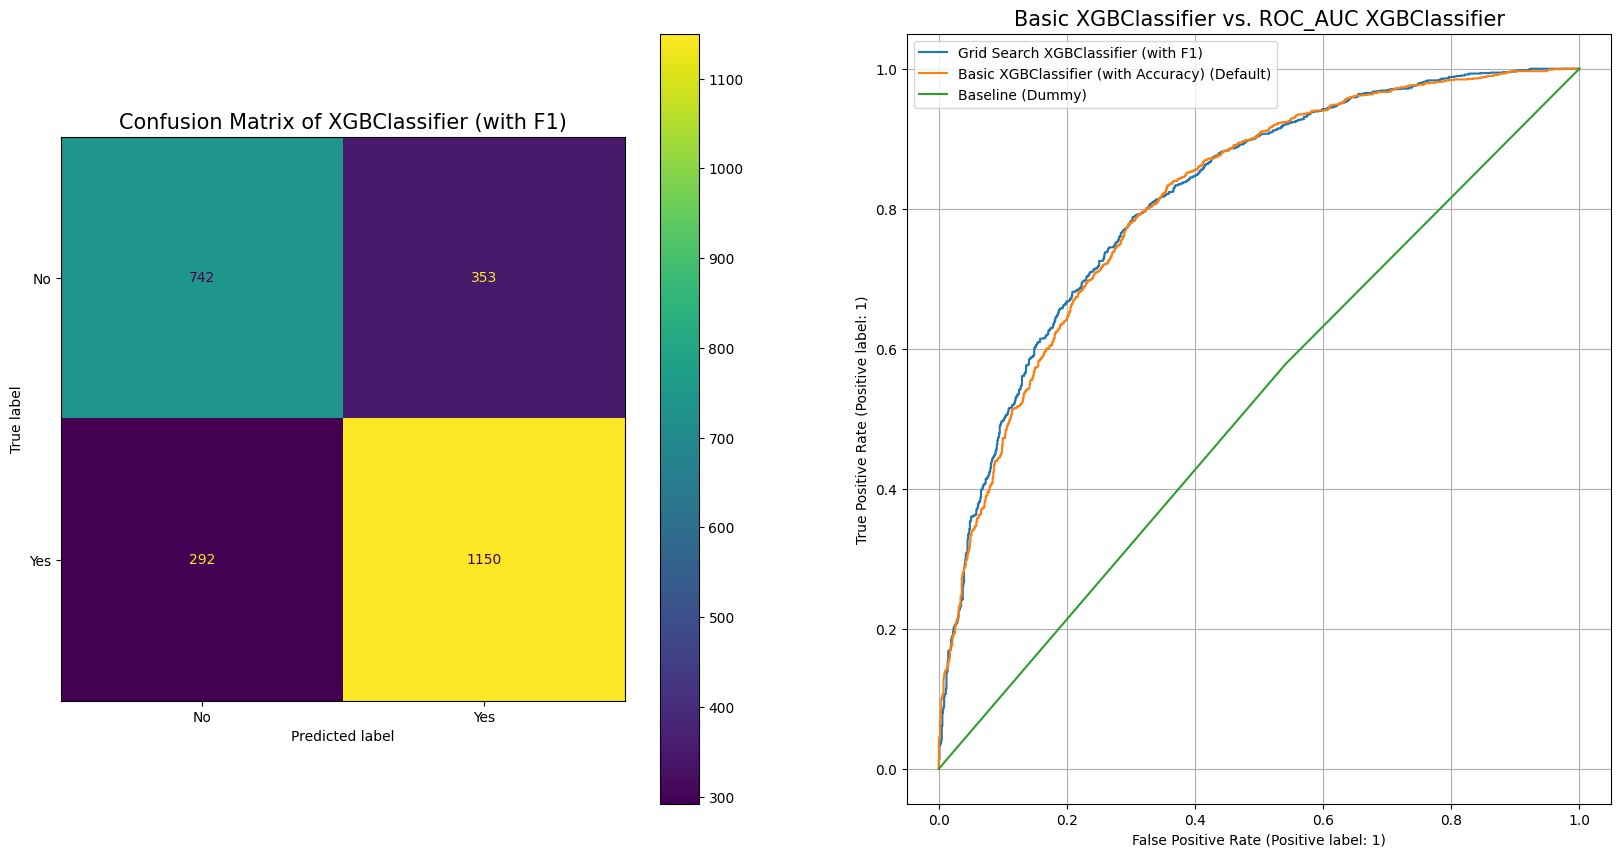

In [80]:
# Create two plots: 1) Confusion Matrix (left) and 2) ROC (right)

fig, ax = plt.subplots(1, 2, figsize = (20, 10))

ConfusionMatrixDisplay.from_estimator(xgb_grid, X_test, y_test, ax = ax[0], display_labels = ['No', 'Yes'])
ax[0].set_title('Confusion Matrix of XGBClassifier (with F1)', fontsize = 15)

RocCurveDisplay.from_estimator(xgb_grid, X_test, y_test, ax = ax[1], 
                               label = 'Grid Search XGBClassifier (with F1)')
RocCurveDisplay.from_estimator(xgb_basic_pipe, X_test, y_test, ax = ax[1], 
                               label = 'Basic XGBClassifier (with Accuracy) (Default)')
RocCurveDisplay.from_estimator(baseline_clf, X_test, y_test, ax = ax[1], label = 'Baseline (Dummy)')
ax[1].set_title('Basic XGBClassifier vs. ROC_AUC XGBClassifier', fontsize = 15)

plt.grid()
plt.legend()

# Save a copy of plot image
plt.savefig('images/Confusion Matrix and ROC_AUC of XGBClassifier.png')

In [81]:
# Grid Search (tuned) Model comparison chart

model_grid_list = ['Logistic Regression', 'KNeighbors',
                   'Decision Tree', 'Support Vector Machines (SVM)',
                   'Random Forest', 'XGBClassifier']

model_grid_train_time = [lgr_grid_CPU_run_time, knn_grid_CPU_run_time,                          
                         dt_grid_CPU_run_time, svc_grid_CPU_run_time,
                         rfc_grid_CPU_run_time, xgb_grid_CPU_run_time]

model_grid_f1_score = [lgr_grid_f1, knn_grid_f1, dt_grid_f1, svc_grid_f1, rfc_grid_f1, xgb_grid_f1]

model_grid_roc_auc_score = [lgr_grid_roc_auc_score, knn_grid_roc_auc_score, 
                            dt_grid_roc_auc_score, svc_grid_roc_auc_score,
                            rfc_grid_roc_auc_score, xgb_grid_roc_auc_score]

df_models_grid = pd.DataFrame(list(zip(model_grid_list, model_grid_train_time,
                                       model_grid_f1_score, model_grid_roc_auc_score)),
                              columns = ['Model (with Grid Search)', 'Train Time (Total CPU Execution time)',
                                         'Test Score (F1)','Test Score (ROC_AUC)']
                             )
df_models_grid

,Model (with Grid Search),Train Time (Total CPU Execution time),Test Score (F1),Test Score (ROC_AUC)
0,Logistic Regression,1.756389,0.741580,0.708575
1,KNeighbors,3.979764,0.708582,0.671023
2,Decision Tree,14.617335,0.724805,0.566362
3,Support Vector Machines (SVM),40.120907,0.741861,0.752226
4,Random Forest,7.367523,0.771502,0.785435
5,XGBClassifier,58.432713,0.780985,0.816749


## Evaluation

- According the above model comparison chart, by focusing on the F1 score and ROC_AUC score, **Random Forest** and **XGBClassifier** have the best overall performances (as approximate 0.77 and 0.78 in F1 score respectively, and approximate 0.78 and 0.82 in ROC_AUC score respectively), despite **Random Forest** and **XGBClassifier** ranked 3rd and 6th shortest elapsed time consumption (in term of computational cost) respectively. 

- Here are the hyperparameters which Grid Search method found for **Random Forest** and **XGBClassifier** models optimisation respectively:

In [82]:
# Summary of the Random Fores model's best Hyperparameters

rfc_grid.best_params_

{'rfc__max_depth': 15,
 'rfc__max_features': 'log2',
 'rfc__min_samples_split': 10,
 'rfc__n_estimators': 100}

In [83]:
# Summary of the XGBClassifier model's best Hyperparameters

xgb_grid.best_params_

{'xgb__colsample_bytree': 0.8,
 'xgb__gamma': 0.5,
 'xgb__max_depth': 9,
 'xgb__min_child_weight': 1,
 'xgb__subsample': 1.0}

- At last, we will use the overall best model, **XGBClassifier**, for further analysis with permutation importance

In [84]:
# Import related libraries for investigate permutation importance

from sklearn.inspection import permutation_importance

In [85]:
# User permutation_importance to investigate the importance of different features to the best model

result_xgb = permutation_importance(xgb_grid.best_estimator_, X_test, y_test, n_repeats = 10, random_state = 42)

# Create a DataFrame to display the results
importance_df_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance_mean': result_xgb.importances_mean,
    'Importance_std': result_xgb.importances_std
})

# Sort the DataFrame by importance_mean in descending order
importance_df_xgb = importance_df_xgb.sort_values(by = 'Importance_mean', ascending = False)
importance_df_xgb

,Feature,Importance_mean,Importance_std
5,coupon,0.117383,0.004998
15,CoffeeHouse,0.041033,0.004221
6,expiration,0.024675,0.004936
14,Bar,0.022231,0.006422
8,age,0.021719,0.004537
13,income,0.021679,0.004882
12,occupation,0.021127,0.002956
0,destination,0.018171,0.003998
10,has_children,0.013362,0.002557
11,education,0.012259,0.005095


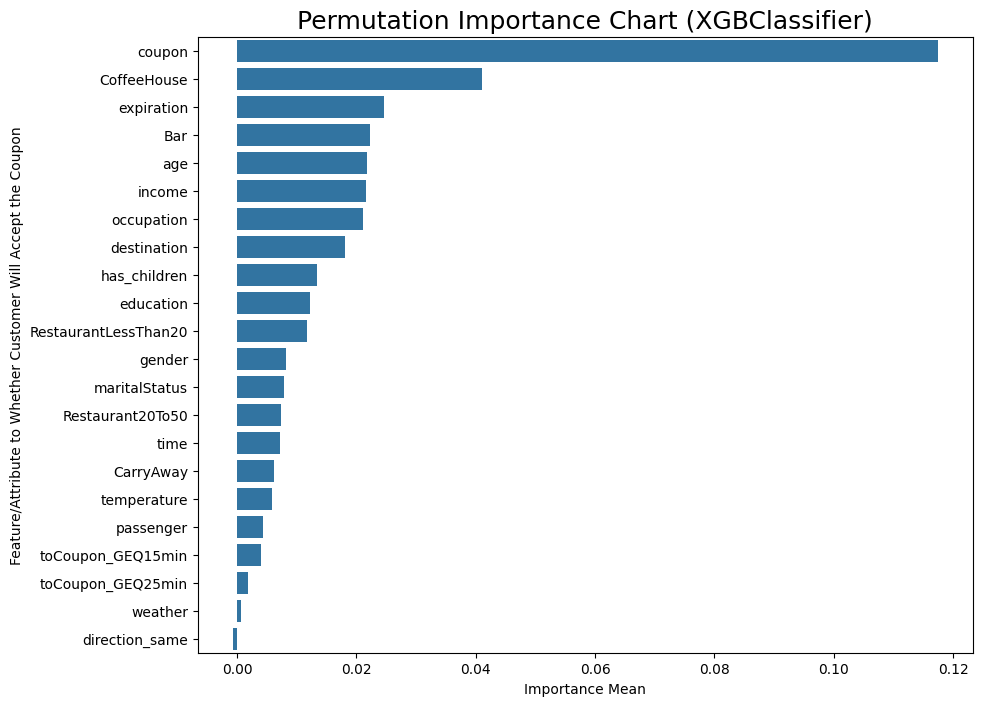

In [86]:
# Plot important features based on permutation importance

plt.figure(figsize = (10, 8))
sns.barplot(importance_df_xgb, x = 'Importance_mean', y = 'Feature')

plt.xlabel('Importance Mean')
plt.ylabel('Feature/Attribute to Whether Customer Will Accept the Coupon')
plt.title('Permutation Importance Chart (XGBClassifier)', fontsize = 18)

# Save a copy of plot image
plt.savefig('images/Plot_important_features_from_permutation_importance_xgb.png')

## Conclusion

According to the provided dataset contain **partial balanced data**, we cannot rely on a performance metric that merely focus on Accuracy score, when comes to model performance comparison. Although all of our built models (Logistic Regression vs KNeighbors vs Decision Tree vs SVM vs Random Fores vs XGBClassifier) have their limitation, their performances all surpassed the baseline model (DummyClassifier). 

By tuning our models with Grid Search (to compute the best Hyperparameter) and utilizing the other two more proper Performance Metrics (**F1 score** and **ROC_AUC score**), we conclude that **XGBClassifier** has the best overall performance, in term of best "accuracy" (best F1 score and ROC_AUC score), but relatively high **computation cost** (2nd longest elapsed time consumption).

With our selected **best model (XGBClassifier)** and the help of permutation importance feature, we are able to compute and visualize the importance of features that may directly influence the Target feature (Wether Customer Will Accept the Coupon). Here are the top 5 features that may impact the decision making to our Target feature.

1. CoffeeHouse
2. expiration
3. income
4. destination
5. occupation

**Note:** Feature "coupon" contains different type of coupon (Restaurant(<20 dollar), Coffee House, Carry out & Take away, Bar, Restaurant(20 dollar - 50 dollar)).

## Next steps and recommendations

In order to achieve better performance and more meaningful result, here are some recommend steps:

- Gather more data for feature engineering, for example, gather features like clients' hobby (User attribute). This will require partner with domain expert
- Data cleaning, such as identify missing value in data point
- Utilize other technique, such as SMOTE and CatBoost Classifier to handle class partial balance or imbalanced concern
- Introduce Time Series analysis for feature group (like time) 
- Utilize other technique for high dimensionality reduction (such as PCA or k-means clustering)

## Deployment

Please click **[Here](https://github.com/jasonszz/MLAI-2023/blob/main/Module_20_Capstone_Project_Initial_Report_and_EDA/README.md)** for Brief Report.